# 안성현

### Imports

In [1]:
#Imports
import numpy as np # linear algebra
import pandas as pd # 데이터 전처리
import seaborn as sns # 시각화
import matplotlib.pyplot as plt # 시각화
import plotly.graph_objects as go
import plotly.express as px

#Seaborn theme
sns.set_theme(style="darkgrid")

### 데이터 로드

In [2]:
#Read csv
df = pd.read_csv("online_store_customer_data.csv", index_col=0)
df.head()

,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent
Transaction_date,,,,,,,,,,
1/1/2019,151200,Female,19.0,Single,Kansas,Basic,Unemployment,Other,1.0,2051.36
1/1/2019,151201,Male,49.0,Single,Illinois,Basic,self-employed,Card,0.0,544.04
1/1/2019,151202,Male,63.0,Married,New Mexico,Basic,workers,PayPal,1.0,1572.60
1/1/2019,151203,NaN,18.0,Single,Virginia,Platinum,workers,Card,1.0,1199.79
1/1/2019,151204,Male,27.0,Single,Connecticut,Basic,self-employed,Card,0.0,NaN


### 데이터 전처리

In [3]:
# 결측치 제거
df = df.dropna(axis=0)
df.head(10)

,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent
Transaction_date,,,,,,,,,,
1/1/2019,151200,Female,19.0,Single,Kansas,Basic,Unemployment,Other,1.0,2051.36
1/1/2019,151201,Male,49.0,Single,Illinois,Basic,self-employed,Card,0.0,544.04
1/1/2019,151202,Male,63.0,Married,New Mexico,Basic,workers,PayPal,1.0,1572.60
1/3/2019,151205,Male,71.0,Single,Hawaii,Basic,Employees,PayPal,1.0,2922.66
1/3/2019,151206,Female,34.0,Married,New Mexico,Platinum,Employees,PayPal,1.0,1481.42
1/3/2019,151207,Male,37.0,Married,Connecticut,Basic,workers,PayPal,1.0,1149.55
1/4/2019,151208,Male,75.0,Married,Florida,Silver,Employees,Card,0.0,1046.20
1/4/2019,151209,Female,41.0,Married,Vermont,Gold,Unemployment,Card,1.0,2730.60
1/4/2019,151210,Female,56.0,Married,California,Basic,Employees,PayPal,0.0,1712.82


In [4]:
df["Amount_spent"] = pd.to_numeric(df["Amount_spent"])
df["Amount_spent"].sum()

2921819.2300000004

In [5]:
df.groupby("Gender")["Amount_spent"].sum()

Gender
Female    1572451.78
Male      1349367.45
Name: Amount_spent, dtype: float64

### 통계 분석

#### 1. 독립 표본 t 검정 : 두 집단의 평균 차이를 검정
1. Levene의 등분산 검정  
2. 독립표본 t 검정

In [6]:
import scipy.stats as stats

In [7]:
# 남자 소비액과 여자 소비액으로 분리
df_Male = df[df['Gender'] == 'Male']
df_Female = df[df['Gender'] == 'Female']
df_Male = df_Male.reset_index()
df_Female = df_Female.reset_index()

#Levene의 등분산 검정 
lresult = stats.levene(df_Male.Amount_spent, df_Female.Amount_spent)
print('LeveneResult(F) : %.3f \np-value : %.3f' % (lresult))
# p-value > 0.05이므로 분산이 동일함
# F 값은 집단 간 분산/집단 내 분산을 말함

LeveneResult(F) : 0.430 
p-value : 0.512


In [8]:
# 독립표본 t 검정
# 앞서 등분산 검정에서 분산이 동일했으면 equal_var = True, 동일하지 않았다면 False로 설정
result = stats.ttest_ind(df_Male.Amount_spent, df_Female.Amount_spent, equal_var=True) 
print('t statistic : %.3f \np-value : %.3f' % (result))
# p-value > 0.05이므로 성별끼리의 소비액에는 차이가 없다(관련이 없다)

t statistic : -0.074 
p-value : 0.941


#### 1. 독립성 검정 : 두 집단의 관계성
1. 이원카이제곱검정

In [9]:
df_Male.head()

,Transaction_date,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent
0,1/1/2019,151201,Male,49.0,Single,Illinois,Basic,self-employed,Card,0.0,544.04
1,1/1/2019,151202,Male,63.0,Married,New Mexico,Basic,workers,PayPal,1.0,1572.60
2,1/3/2019,151205,Male,71.0,Single,Hawaii,Basic,Employees,PayPal,1.0,2922.66
3,1/3/2019,151207,Male,37.0,Married,Connecticut,Basic,workers,PayPal,1.0,1149.55
4,1/4/2019,151208,Male,75.0,Married,Florida,Silver,Employees,Card,0.0,1046.20


### 성별 그룹핑

#### Seaborn 막대 그래프

Text(0.5, 1.0, 'Total Transaction by Gender')

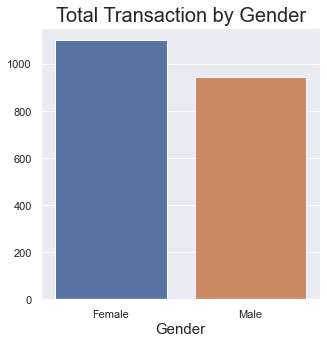

In [10]:
# 성별로 그룹핑 후 전체 거래 횟수 시각화
df_by_gender = df.groupby("Gender").size().sort_values(ascending=False).reset_index()
plt.rcParams["figure.figsize"] = (5, 5)
ax = sns.barplot(x="Gender", y=0, data=df_by_gender, order=df_by_gender.Gender)
ax.set_xlabel("Gender", fontsize=15)
ax.set_ylabel("")
ax.set_title("Total Transaction by Gender", fontsize=20)

Text(0.5, 1.0, 'Total Spend by Gender')

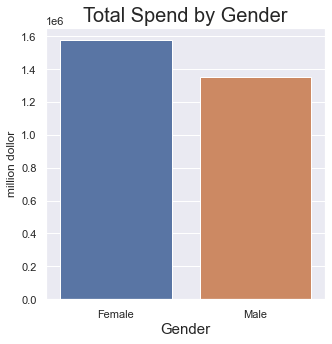

In [11]:
# 성별로 그룹핑 후 전체 소비액
df_by_gender = df.groupby("Gender").sum().reset_index()
plt.rcParams["figure.figsize"] = (5, 5)
ax = sns.barplot(x="Gender", y="Amount_spent", data=df_by_gender, order=df_by_gender.Gender)
ax.set_xlabel("Gender", fontsize=15)
ax.set_ylabel("million dollor")
ax.set_title("Total Spend by Gender", fontsize=20)

In [12]:
plt.rcParams["figure.figsize"] = (15, 5)

Text(0.5, 1.0, 'Mean Spend by Gender')

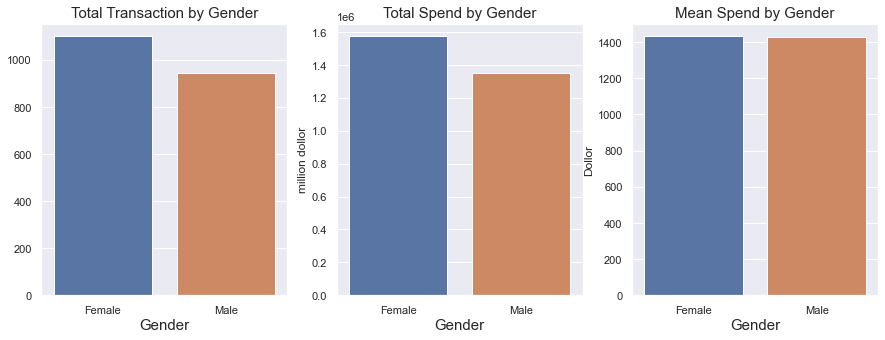

In [13]:
fig, ax = plt.subplots(ncols=3)
# 성별로 그룹핑하여 전체 거래 수
df_by_gender = df.groupby("Gender").size().sort_values(ascending=False).reset_index()
ax1 = sns.barplot(x="Gender", y=0, data=df_by_gender, order=df_by_gender.Gender, ax=ax[0])
ax1.set_xlabel("Gender", fontsize=15)
ax1.set_ylabel("")
ax1.set_title("Total Transaction by Gender", fontsize=15)
# 성별로 그룹핑하여 총액
df_by_gender = df.groupby("Gender").sum().reset_index()
ax2 = sns.barplot(x="Gender", y="Amount_spent", data=df_by_gender, order=df_by_gender.Gender, ax=ax[1])
ax2.set_xlabel("Gender", fontsize=15)
ax2.set_ylabel("million dollor")
ax2.set_title("Total Spend by Gender", fontsize=15)
# 성별로 그룹핑하여 평균 소비액
df_by_gender = df.groupby("Gender").mean().reset_index()
ax3 = sns.barplot(x="Gender", y="Amount_spent", data=df_by_gender, order=df_by_gender.Gender, ax=ax[2])
ax3.set_xlabel("Gender", fontsize=15)
ax3.set_ylabel("Dollor")
ax3.set_title("Mean Spend by Gender", fontsize=15)

#### Plotly graphic_object

In [14]:
# 성별로 그룹핑 후 전체 거래 횟수 시각화
df_by_gender = df.groupby("Gender").size().sort_values(ascending=False).reset_index()

colors = sns.color_palette('hls', len(df_by_gender['Gender'])).as_hex()
# x축 연도, y축 인구수, Bar 클래스 생성
data = go.Bar(x=df_by_gender['Gender'], y=df_by_gender[0], 
              marker = {'color':colors,# 막대 색상 또는 리스트를 이용하여 각 막대 색상 변경가능
                        'line':{'color':'black', 'width':2}, # 막대 테두리 설정
                        'pattern':{'shape':'/'}, # 사선 패턴
                       },
              width=0.5, # 막대 폭
             ) 
layout = go.Layout(title={'text':'Total transaction by Gender',
                          'font':{'size':20}}, # Title 설정
                   paper_bgcolor='white', # 차트 바깥쪽 배경색
                   plot_bgcolor='#C0FFFF', # 차트 안쪽 배경색
                   font = {'color':'black'} # 전체 글자(폰트) 색상
                  ) 
 
# 막대 그래프(Bar Chart, 바 차트)를 포함하는
# Figure 생성
fig = go.Figure(data=data, layout=layout) 
fig.show()

# 마우스 가져가면 값이 나오는 인터랙티브

In [15]:
# 성별로 그룹핑 후 총액 시각화
df_by_gender = df.groupby("Gender").sum().reset_index()

colors = sns.color_palette('hls', len(df_by_gender['Gender'])).as_hex()
# x축 연도, y축 인구수, Bar 클래스 생성
data = go.Bar(x=df_by_gender['Gender'], y=df_by_gender['Amount_spent'], 
              marker = {'color':colors,# 막대 색상 또는 리스트를 이용하여 각 막대 색상 변경가능
                        'line':{'color':'black', 'width':2}, # 막대 테두리 설정
                        'pattern':{'shape':'/'}, # 사선 패턴
                       },
              width=0.5, # 막대 폭
             ) 
layout = go.Layout(title={'text':'Total Amount_spent by Gender',
                          'font':{'size':20}}, # Title 설정
                   paper_bgcolor='white', # 차트 바깥쪽 배경색
                   plot_bgcolor='#C0FFFF', # 차트 안쪽 배경색
                   font = {'color':'black'} # 전체 글자(폰트) 색상
                  ) 
 
# 막대 그래프(Bar Chart, 바 차트)를 포함하는
# Figure 생성
fig = go.Figure(data=data, layout=layout) 
fig.show()

# 마우스 가져가면 값이 나오는 인터랙티브

In [16]:
# 성별로 그룹핑 후 평균 소비액 시각화
df_by_gender = df.groupby("Gender").mean().reset_index()

colors = sns.color_palette('hls', len(df_by_gender['Gender'])).as_hex()
# x축 연도, y축 인구수, Bar 클래스 생성
data = go.Bar(x=df_by_gender['Gender'], y=df_by_gender['Amount_spent'], 
              marker = {'color':colors,# 막대 색상 또는 리스트를 이용하여 각 막대 색상 변경가능
                        'line':{'color':'black', 'width':2}, # 막대 테두리 설정
                        'pattern':{'shape':'/'}, # 사선 패턴
                       },
              width=0.5, # 막대 폭
             ) 
layout = go.Layout(title={'text':'Average Amount_spent by Gender',
                          'font':{'size':20}}, # Title 설정
                   paper_bgcolor='white', # 차트 바깥쪽 배경색
                   plot_bgcolor='#C0FFFF', # 차트 안쪽 배경색
                   font = {'color':'black'} # 전체 글자(폰트) 색상
                  ) 
 
# 막대 그래프(Bar Chart, 바 차트)를 포함하는
# Figure 생성
fig = go.Figure(data=data, layout=layout) 
fig.show()

# 마우스 가져가면 값이 나오는 인터랙티브

#### Seaborn Pie Graph

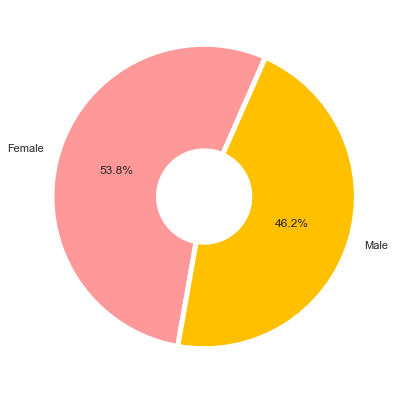

In [17]:
# 성별 총액 비율
plt.rcParams["figure.figsize"] = (7, 7)
df_by_gender = df.groupby("Gender").sum().reset_index()
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(df_by_gender["Amount_spent"], labels=df_by_gender["Gender"], autopct='%.1f%%', startangle=260, counterclock=False, colors=colors, wedgeprops=wedgeprops)
plt.show()

#### Plotly 파이 그래프

In [18]:
# 등급별로 그룹핑하여 총액 비율 파이 그래프
df_by_gender = df.groupby("Gender").sum().reset_index()
fig = px.pie(df_by_gender, values='Amount_spent', names='Gender', hole=.3)
fig.show()

### 혼인 여부 그룹핑

#### Seaborn 막대 그래프

Text(0.5, 1.0, 'Total Transaction by Marital_status')

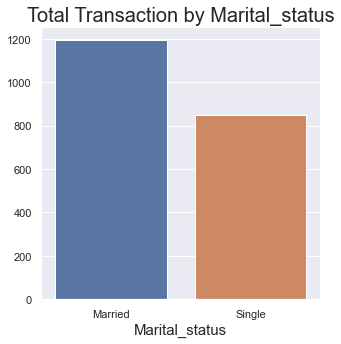

In [19]:
# 혼인 여부로 그룹핑하여 전체 거래 수
df_by_martial = df.groupby("Marital_status").size().sort_values(ascending=False).reset_index()
plt.rcParams["figure.figsize"] = (5, 5)
ax = sns.barplot(x="Marital_status", y=0, data=df_by_martial, order=df_by_martial.Marital_status)
ax.set_xlabel("Marital_status", fontsize=15)
ax.set_ylabel("")
ax.set_title("Total Transaction by Marital_status", fontsize=20)

Text(0.5, 1.0, 'Total Spend by Marital_status')

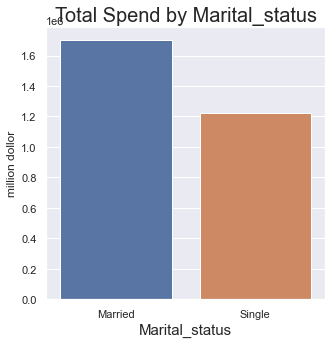

In [20]:
# 혼인 여부로 총액 그룹핑
df_by_martial = df.groupby("Marital_status").sum().reset_index()
plt.rcParams["figure.figsize"] = (5, 5)
ax = sns.barplot(x="Marital_status", y="Amount_spent", data=df_by_martial, order=df_by_martial.Marital_status)
ax.set_xlabel("Marital_status", fontsize=15)
ax.set_ylabel("million dollor")
ax.set_title("Total Spend by Marital_status", fontsize=20)

In [21]:
plt.rcParams["figure.figsize"] = (15, 5)

Text(0.5, 1.0, 'Mean Spend by Marital_status')

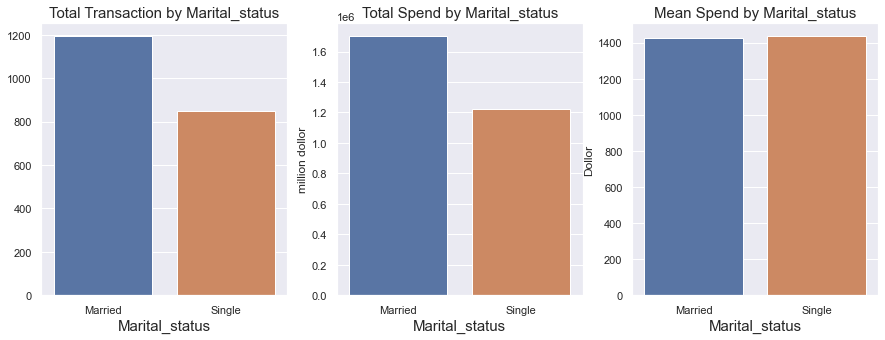

In [22]:
fig, ax = plt.subplots(ncols=3)
# 혼인 여부로 그룹핑하여 전체 거래 수
df_by_martial = df.groupby("Marital_status").size().sort_values(ascending=False).reset_index()
ax1 = sns.barplot(x="Marital_status", y=0, data=df_by_martial, order=df_by_martial.Marital_status, ax=ax[0])
ax1.set_xlabel("Marital_status", fontsize=15)
ax1.set_ylabel("")
ax1.set_title("Total Transaction by Marital_status", fontsize=15)
# 혼인 여부로 그룹핑하여 총액
df_by_martial = df.groupby("Marital_status").sum().reset_index()
ax2 = sns.barplot(x="Marital_status", y="Amount_spent", data=df_by_martial, order=df_by_martial.Marital_status, ax=ax[1])
ax2.set_xlabel("Marital_status", fontsize=15)
ax2.set_ylabel("million dollor")
ax2.set_title("Total Spend by Marital_status", fontsize=15)
# 혼인 여부로 그룹핑하여 평균 소비액
df_by_martial = df.groupby("Marital_status").mean().reset_index()
ax3 = sns.barplot(x="Marital_status", y="Amount_spent", data=df_by_martial, order=df_by_martial.Marital_status, ax=ax[2])
ax3.set_xlabel("Marital_status", fontsize=15)
ax3.set_ylabel("Dollor")
ax3.set_title("Mean Spend by Marital_status", fontsize=15)

#### Plotly 막대 그래프

In [23]:
# 결혼 여부로 그룹핑 후 거래 횟수 시각화
df_by_martial = df.groupby("Marital_status").size().sort_values(ascending=False).reset_index()

colors = sns.color_palette('hls', len(df_by_martial['Marital_status'])).as_hex()
# x축 연도, y축 인구수, Bar 클래스 생성
data = go.Bar(x=df_by_martial['Marital_status'], y=df_by_martial[0], 
              marker = {'color':colors,# 막대 색상 또는 리스트를 이용하여 각 막대 색상 변경가능
                        'line':{'color':'black', 'width':2}, # 막대 테두리 설정
                        'pattern':{'shape':'/'}, # 사선 패턴
                       },
              width=0.5, # 막대 폭
             ) 
layout = go.Layout(title={'text':'Total Transaction by Marital_status',
                          'font':{'size':20}}, # Title 설정
                   paper_bgcolor='white', # 차트 바깥쪽 배경색
                   plot_bgcolor='#C0FFFF', # 차트 안쪽 배경색
                   font = {'color':'black'} # 전체 글자(폰트) 색상
                  ) 
 
# 막대 그래프(Bar Chart, 바 차트)를 포함하는
# Figure 생성
fig = go.Figure(data=data, layout=layout) 
fig.show()

# 마우스 가져가면 값이 나오는 인터랙티브

In [24]:
# 결혼 여부로 그룹핑 후 총액 시각화
df_by_martial = df.groupby("Marital_status").sum().reset_index()

colors = sns.color_palette('hls', len(df_by_martial['Marital_status'])).as_hex()
# x축 연도, y축 인구수, Bar 클래스 생성
data = go.Bar(x=df_by_martial['Marital_status'], y=df_by_martial['Amount_spent'], 
              marker = {'color':colors,# 막대 색상 또는 리스트를 이용하여 각 막대 색상 변경가능
                        'line':{'color':'black', 'width':2}, # 막대 테두리 설정
                        'pattern':{'shape':'/'}, # 사선 패턴
                       },
              width=0.5, # 막대 폭
             ) 
layout = go.Layout(title={'text':'Total Amount_spent by Marital_status',
                          'font':{'size':20}}, # Title 설정
                   paper_bgcolor='white', # 차트 바깥쪽 배경색
                   plot_bgcolor='#C0FFFF', # 차트 안쪽 배경색
                   font = {'color':'black'} # 전체 글자(폰트) 색상
                  ) 
 
# 막대 그래프(Bar Chart, 바 차트)를 포함하는
# Figure 생성
fig = go.Figure(data=data, layout=layout) 
fig.show()

# 마우스 가져가면 값이 나오는 인터랙티브

In [25]:
# 결혼 여부로 그룹핑 후 평균 소비액 시각화
df_by_martial = df.groupby("Marital_status").mean().reset_index()

colors = sns.color_palette('hls', len(df_by_martial['Marital_status'])).as_hex()
# x축 연도, y축 인구수, Bar 클래스 생성
data = go.Bar(x=df_by_martial['Marital_status'], y=df_by_martial['Amount_spent'], 
              marker = {'color':colors,# 막대 색상 또는 리스트를 이용하여 각 막대 색상 변경가능
                        'line':{'color':'black', 'width':2}, # 막대 테두리 설정
                        'pattern':{'shape':'/'}, # 사선 패턴
                       },
              width=0.5, # 막대 폭
             ) 
layout = go.Layout(title={'text':'Average Amount_spent by Marital_status',
                          'font':{'size':20}}, # Title 설정
                   paper_bgcolor='white', # 차트 바깥쪽 배경색
                   plot_bgcolor='#C0FFFF', # 차트 안쪽 배경색
                   font = {'color':'black'} # 전체 글자(폰트) 색상
                  ) 
 
# 막대 그래프(Bar Chart, 바 차트)를 포함하는
# Figure 생성
fig = go.Figure(data=data, layout=layout) 
fig.show()

# 마우스 가져가면 값이 나오는 인터랙티브

#### Seaborn 파이 그래프

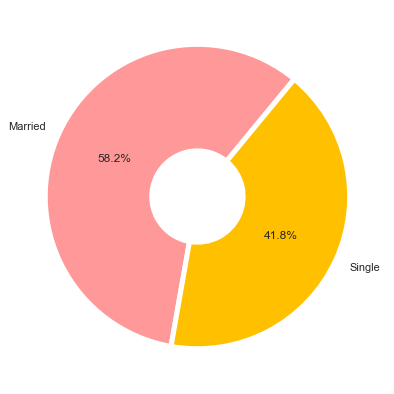

In [26]:
# 결혼 여부 총액 비율
plt.rcParams["figure.figsize"] = (7, 7)
df_by_martial = df.groupby("Marital_status").sum().reset_index()
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(df_by_martial["Amount_spent"], labels=df_by_martial["Marital_status"], autopct='%.1f%%', startangle=260, counterclock=False, colors=colors, wedgeprops=wedgeprops)
plt.show()

#### Plotly 파이 그래프
1. hole 인자는 가운데 구멍 크기 0.3 = 30%

In [27]:
# 등급별로 그룹핑하여 총액 비율 파이 그래프
df_by_martial = df.groupby("Marital_status").sum().reset_index()
fig = px.pie(df_by_martial, values='Amount_spent', names='Marital_status', hole=.3)
fig.show()

### 지역으로 그룹핑

Text(0.5, 1.0, 'Total Transaction by State')

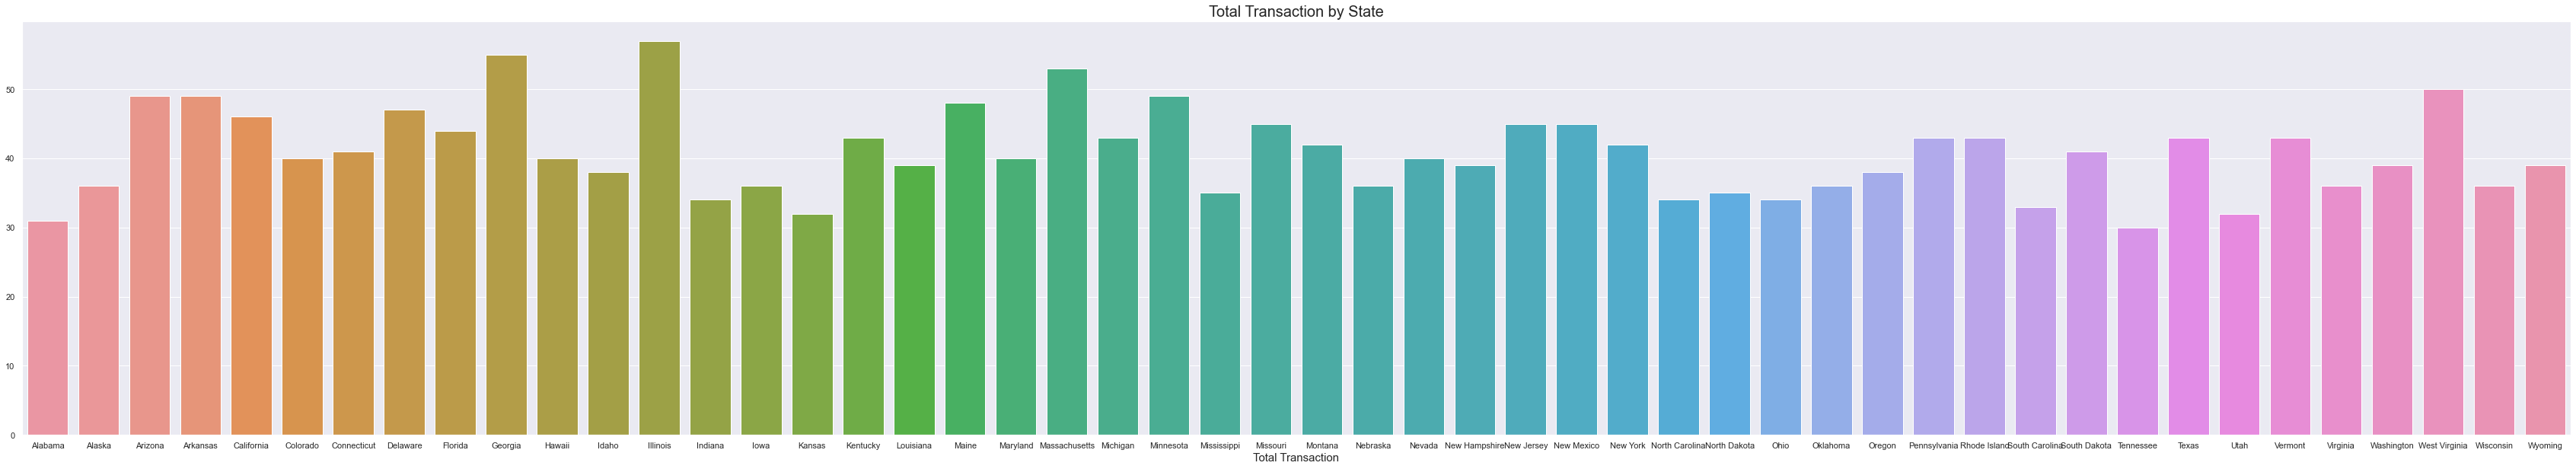

In [28]:
# 지역으로 그룹핑
df_by_state = df.groupby("State_names").size().reset_index()
plt.rcParams["figure.figsize"] = (60, 10)
ax = sns.barplot(x="State_names", y=0, data=df_by_state, order=df_by_state.State_names)
ax.set_xlabel("Total Transaction", fontsize=15)
ax.set_ylabel("")
ax.set_title("Total Transaction by State", fontsize=20)

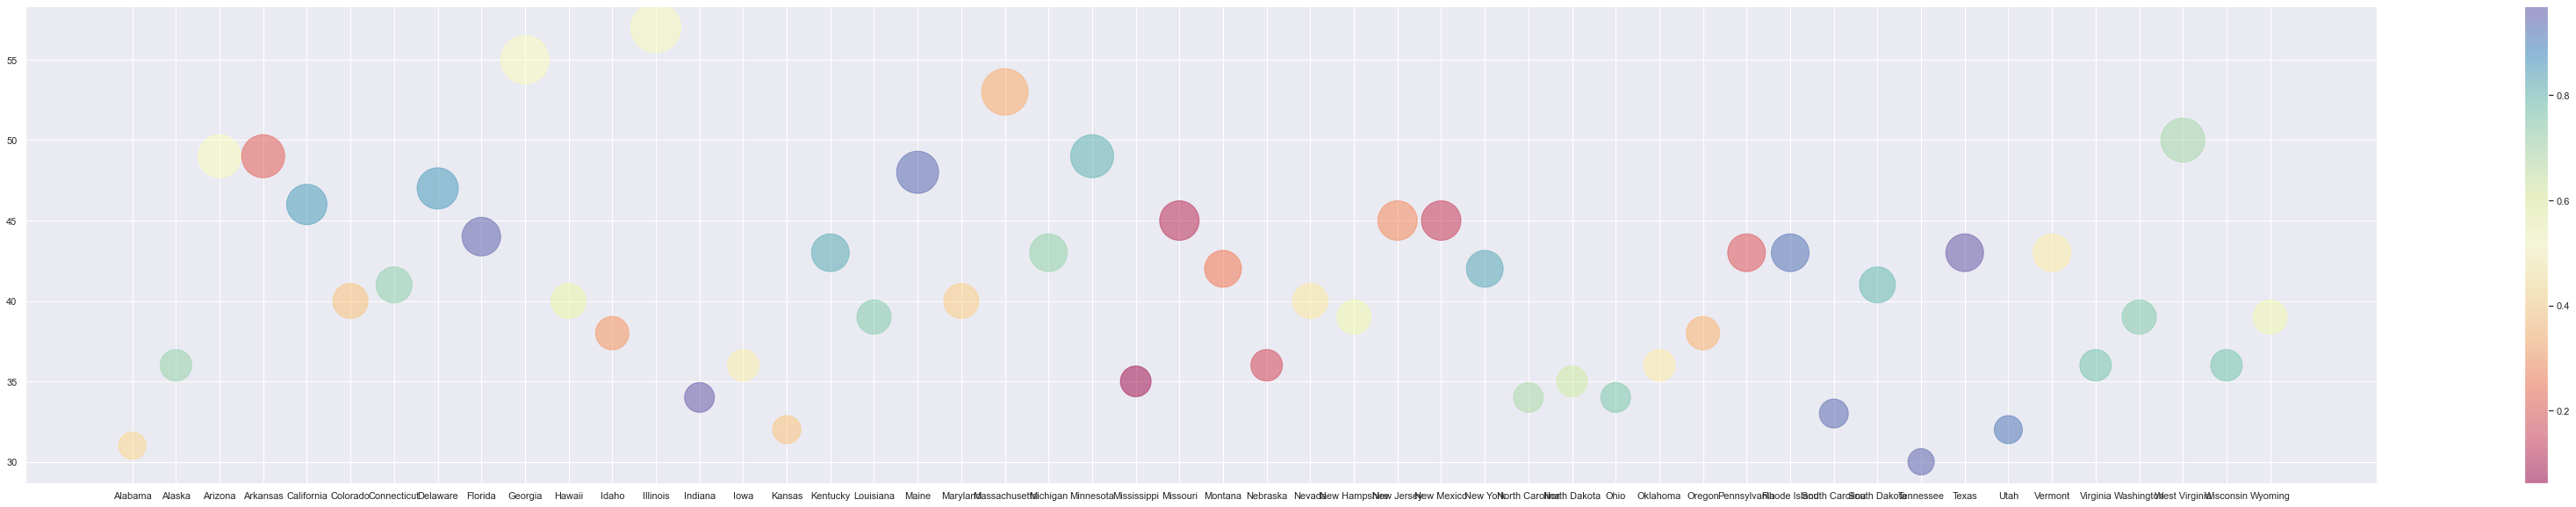

In [29]:
area = (df_by_state[0])**2  # 발생 건수에 따라 크기 조절
colors = np.random.rand(len(df_by_state["State_names"])) # xtick 길이만큼 색상 매번 랜덤

plt.scatter(df_by_state["State_names"], df_by_state[0], s=area, c=colors, alpha=0.5, cmap='Spectral')
plt.colorbar()
plt.show()

### 멤버십 등급 그룹핑

#### Seaborn 막대 그래프

Text(0.5, 1.0, 'Total Transaction by Segment')

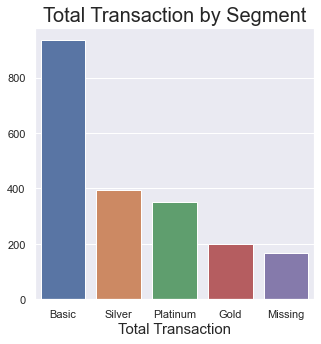

In [30]:
# 멤버쉽 등급으로 그룹핑 - 총 거래 수
df_by_segment = df.groupby("Segment").size().sort_values(ascending=False).reset_index()
plt.rcParams["figure.figsize"] = (5, 5)
ax = sns.barplot(x="Segment", y=0, data=df_by_segment, order=df_by_segment.Segment)
ax.set_xlabel("Total Transaction", fontsize=15)
ax.set_ylabel("")
ax.set_title("Total Transaction by Segment", fontsize=20)

Text(0.5, 1.0, 'Total Spend by Segment')

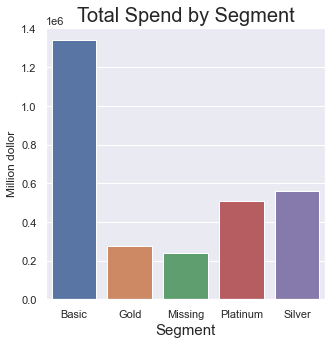

In [31]:
# 멤버쉽 등급으로 그룹핑 - 총 소비 액수
df_by_segment = df.groupby("Segment").sum().reset_index()
plt.rcParams["figure.figsize"] = (5, 5)
ax = sns.barplot(x="Segment", y="Amount_spent", data=df_by_segment, order=df_by_segment.Segment)
ax.set_xlabel("Segment", fontsize=15)
ax.set_ylabel("Million dollor")
ax.set_title("Total Spend by Segment", fontsize=20)

In [32]:
plt.rcParams["figure.figsize"] = (15, 5)

Text(0.5, 1.0, 'Mean Spend by Segment')

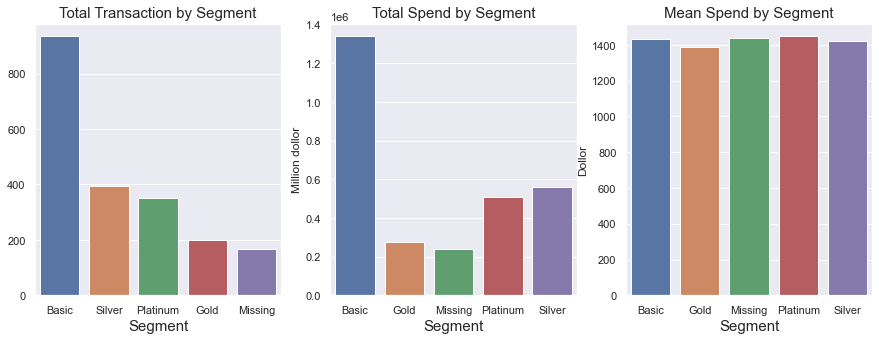

In [33]:
fig, ax = plt.subplots(ncols=3)

df_by_segment = df.groupby("Segment").size().sort_values(ascending=False).reset_index()
ax1 = sns.barplot(x="Segment", y=0, data=df_by_segment, order=df_by_segment.Segment, ax = ax[0])
ax1.set_xlabel("Segment", fontsize=15)
ax1.set_ylabel("")
ax1.set_title("Total Transaction by Segment", fontsize=15)

df_by_segment = df.groupby("Segment").sum().reset_index()
ax2 = sns.barplot(x="Segment", y="Amount_spent", data=df_by_segment, order=df_by_segment.Segment, ax=ax[1])
ax2.set_xlabel("Segment", fontsize=15)
ax2.set_ylabel("Million dollor")
ax2.set_title("Total Spend by Segment", fontsize=15)

# 등급별 평균 소비 액수
df_by_segment = df.groupby("Segment").mean().reset_index()
ax3 = sns.barplot(x="Segment", y="Amount_spent", data=df_by_segment, order=df_by_segment.Segment, ax=ax[2])
ax3.set_xlabel("Segment", fontsize=15)
ax3.set_ylabel("Dollor")
ax3.set_title("Mean Spend by Segment", fontsize=15)

#### Plotly 막대 그래프

In [34]:
# 등급별로 그룹핑하여 전체 거래 횟수
df_by_segment = df.groupby("Segment").size().sort_values(ascending=False).reset_index()

colors = sns.color_palette('hls', len(df_by_segment['Segment'])).as_hex()
# x축 연도, y축 인구수, Bar 클래스 생성
data = go.Bar(x=df_by_segment['Segment'], y=df_by_segment[0], 
              marker = {'color':colors,# 막대 색상 또는 리스트를 이용하여 각 막대 색상 변경가능
                        'line':{'color':'black', 'width':2}, # 막대 테두리 설정
                        'pattern':{'shape':'/'}, # 사선 패턴
                       },
              width=0.5, # 막대 폭
             ) 
layout = go.Layout(title={'text':'Total Transaction by Segment',
                          'font':{'size':20}}, # Title 설정
                   paper_bgcolor='white', # 차트 바깥쪽 배경색
                   plot_bgcolor='#C0FFFF', # 차트 안쪽 배경색
                   font = {'color':'black'} # 전체 글자(폰트) 색상
                  ) 
 
# 막대 그래프(Bar Chart, 바 차트)를 포함하는
# Figure 생성
fig = go.Figure(data=data, layout=layout) 
fig.show()

# 마우스 가져가면 값이 나오는 인터랙티브

In [35]:
# 등급별로 그룹핑하여 전체 거래 횟수
df_by_segment = df.groupby("Segment").sum().reset_index()

colors = sns.color_palette('hls', len(df_by_segment['Segment'])).as_hex()
# x축 연도, y축 인구수, Bar 클래스 생성
data = go.Bar(x=df_by_segment['Segment'], y=df_by_segment['Amount_spent'], 
              marker = {'color':colors,# 막대 색상 또는 리스트를 이용하여 각 막대 색상 변경가능
                        'line':{'color':'black', 'width':2}, # 막대 테두리 설정
                        'pattern':{'shape':'/'}, # 사선 패턴
                       },
              width=0.5, # 막대 폭
             ) 
layout = go.Layout(title={'text':'Total Amount_spent by Segment',
                          'font':{'size':20}}, # Title 설정
                   paper_bgcolor='white', # 차트 바깥쪽 배경색
                   plot_bgcolor='#C0FFFF', # 차트 안쪽 배경색
                   font = {'color':'black'} # 전체 글자(폰트) 색상
                  ) 
 
# 막대 그래프(Bar Chart, 바 차트)를 포함하는
# Figure 생성
fig = go.Figure(data=data, layout=layout) 
fig.show()

# 마우스 가져가면 값이 나오는 인터랙티브

In [36]:
# 등급별로 그룹핑하여 전체 거래 횟수
df_by_segment = df.groupby("Segment").mean().reset_index()

colors = sns.color_palette('hls', len(df_by_segment['Segment'])).as_hex()
# x축 연도, y축 인구수, Bar 클래스 생성
data = go.Bar(x=df_by_segment['Segment'], y=df_by_segment['Amount_spent'], 
              marker = {'color':colors,# 막대 색상 또는 리스트를 이용하여 각 막대 색상 변경가능
                        'line':{'color':'black', 'width':2}, # 막대 테두리 설정
                        'pattern':{'shape':'/'}, # 사선 패턴
                       },
              width=0.5, # 막대 폭
             ) 
layout = go.Layout(title={'text':'Average Amount_spent by Segment',
                          'font':{'size':20}}, # Title 설정
                   paper_bgcolor='white', # 차트 바깥쪽 배경색
                   plot_bgcolor='#C0FFFF', # 차트 안쪽 배경색
                   font = {'color':'black'} # 전체 글자(폰트) 색상
                  ) 
 
# 막대 그래프(Bar Chart, 바 차트)를 포함하는
# Figure 생성
fig = go.Figure(data=data, layout=layout) 
fig.show()

# 마우스 가져가면 값이 나오는 인터랙티브

#### Seaborn 파이 그래프

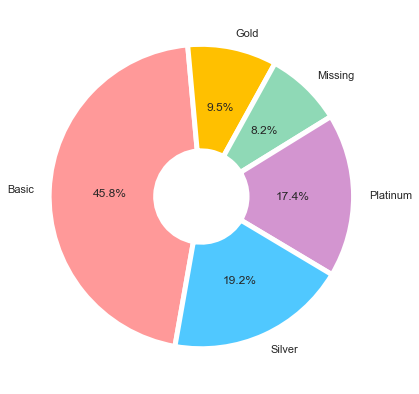

In [37]:
# 총액 비율
df_by_segment = df.groupby("Segment").sum().reset_index()
plt.rcParams["figure.figsize"] = (7, 7)
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', "#50C8FF"]
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(df_by_segment["Amount_spent"], labels=df_by_segment["Segment"], autopct='%.1f%%', startangle=260, counterclock=False, colors=colors, wedgeprops=wedgeprops)
plt.show()

#### Plotly 파이 그래프

In [38]:
# 등급별로 그룹핑하여 총액 비율 파이 그래프
df_by_segment = df.groupby("Segment").sum().reset_index()
fig = px.pie(df_by_segment, values='Amount_spent', names='Segment', hole=.3)
fig.show()

### 구직 상태로 그룹핑

#### Seaborn 막대 그래프

Text(0.5, 1.0, 'Total Transaction by Employees_status')

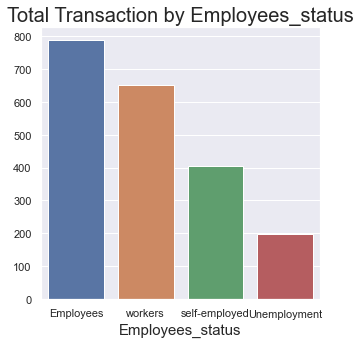

In [39]:
# 구직 상태로 그룹핑
df_by_employee = df.groupby("Employees_status").size().sort_values(ascending=False).reset_index()
plt.rcParams["figure.figsize"] = (5, 5)
ax = sns.barplot(x="Employees_status", y=0, data=df_by_employee, order=df_by_employee.Employees_status)
ax.set_xlabel("Employees_status", fontsize=15)
ax.set_ylabel("")
ax.set_title("Total Transaction by Employees_status", fontsize=20)

Text(0.5, 1.0, 'Total Spend by Employees_status')

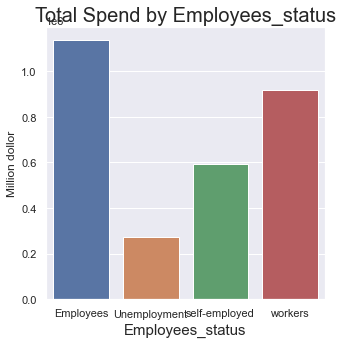

In [40]:
df_by_employee = df.groupby("Employees_status").sum().reset_index()
plt.rcParams["figure.figsize"] = (5, 5)
ax = sns.barplot(x="Employees_status", y="Amount_spent", data=df_by_employee, order=df_by_employee.Employees_status)
ax.set_xlabel("Employees_status", fontsize=15)
ax.set_ylabel("Million dollor")
ax.set_title("Total Spend by Employees_status", fontsize=20)

In [41]:
plt.rcParams["figure.figsize"] = (15, 5)

Text(0.5, 1.0, 'Mean Spend by Employees_status')

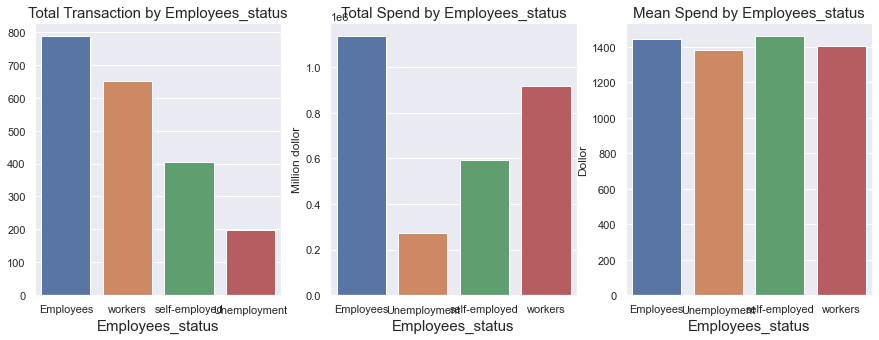

In [42]:
fig, ax = plt.subplots(ncols=3)
df_by_employee = df.groupby("Employees_status").size().sort_values(ascending=False).reset_index()
ax1 = sns.barplot(x="Employees_status", y=0, data=df_by_employee, order=df_by_employee.Employees_status, ax=ax[0])
ax1.set_xlabel("Employees_status", fontsize=15)
ax1.set_ylabel("")
ax1.set_title("Total Transaction by Employees_status", fontsize=15)

df_by_employee = df.groupby("Employees_status").sum().reset_index()
ax2 = sns.barplot(x="Employees_status", y="Amount_spent", data=df_by_employee, order=df_by_employee.Employees_status, ax=ax[1])
ax2.set_xlabel("Employees_status", fontsize=15)
ax2.set_ylabel("Million dollor")
ax2.set_title("Total Spend by Employees_status", fontsize=15)

# 구직 상태 별 평균 소비액
df_by_employee = df.groupby("Employees_status").mean().reset_index()
ax3 = sns.barplot(x="Employees_status", y="Amount_spent", data=df_by_employee, order=df_by_employee.Employees_status, ax=ax[2])
ax3.set_xlabel("Employees_status", fontsize=15)
ax3.set_ylabel("Dollor")
ax3.set_title("Mean Spend by Employees_status", fontsize=15)

#### Ploty 막대 그래프

In [43]:
# 구직 상태로 그룹핑하여 전체 거래 수
df_by_segment = df.groupby("Employees_status").size().sort_values(ascending=False).reset_index()

colors = sns.color_palette('hls', len(df_by_segment['Employees_status'])).as_hex()
# x축 연도, y축 인구수, Bar 클래스 생성
data = go.Bar(x=df_by_segment['Employees_status'], y=df_by_segment[0], 
              marker = {'color':colors,# 막대 색상 또는 리스트를 이용하여 각 막대 색상 변경가능
                        'line':{'color':'black', 'width':2}, # 막대 테두리 설정
                        'pattern':{'shape':'/'}, # 사선 패턴
                       },
              width=0.5, # 막대 폭
             ) 
layout = go.Layout(title={'text':'Total Transaction by Employees_status',
                          'font':{'size':20}}, # Title 설정
                   paper_bgcolor='white', # 차트 바깥쪽 배경색
                   plot_bgcolor='#C0FFFF', # 차트 안쪽 배경색
                   font = {'color':'black'} # 전체 글자(폰트) 색상
                  ) 
 
# 막대 그래프(Bar Chart, 바 차트)를 포함하는
# Figure 생성
fig = go.Figure(data=data, layout=layout) 
fig.show()

# 마우스 가져가면 값이 나오는 인터랙티브

In [44]:
# 구직 상태로 그룹핑하여 총액
df_by_segment = df.groupby("Employees_status").sum().reset_index()

colors = sns.color_palette('hls', len(df_by_segment['Employees_status'])).as_hex()
# x축 연도, y축 인구수, Bar 클래스 생성
data = go.Bar(x=df_by_segment['Employees_status'], y=df_by_segment['Amount_spent'], 
              marker = {'color':colors,# 막대 색상 또는 리스트를 이용하여 각 막대 색상 변경가능
                        'line':{'color':'black', 'width':2}, # 막대 테두리 설정
                        'pattern':{'shape':'/'}, # 사선 패턴
                       },
              width=0.5, # 막대 폭
             ) 
layout = go.Layout(title={'text':'Total Amount_spent by Employees_status',
                          'font':{'size':20}}, # Title 설정
                   paper_bgcolor='white', # 차트 바깥쪽 배경색
                   plot_bgcolor='#C0FFFF', # 차트 안쪽 배경색
                   font = {'color':'black'} # 전체 글자(폰트) 색상
                  ) 
 
# 막대 그래프(Bar Chart, 바 차트)를 포함하는
# Figure 생성
fig = go.Figure(data=data, layout=layout) 
fig.show()

# 마우스 가져가면 값이 나오는 인터랙티브

In [45]:
# 구직 상태로 그룹핑하여 평균 소비액
df_by_segment = df.groupby("Employees_status").mean().reset_index()

colors = sns.color_palette('hls', len(df_by_segment['Employees_status'])).as_hex()
# x축 연도, y축 인구수, Bar 클래스 생성
data = go.Bar(x=df_by_segment['Employees_status'], y=df_by_segment['Amount_spent'], 
              marker = {'color':colors,# 막대 색상 또는 리스트를 이용하여 각 막대 색상 변경가능
                        'line':{'color':'black', 'width':2}, # 막대 테두리 설정
                        'pattern':{'shape':'/'}, # 사선 패턴
                       },
              width=0.5, # 막대 폭
             ) 
layout = go.Layout(title={'text':'Average Amount_spent by Employees_status',
                          'font':{'size':20}}, # Title 설정
                   paper_bgcolor='white', # 차트 바깥쪽 배경색
                   plot_bgcolor='#C0FFFF', # 차트 안쪽 배경색
                   font = {'color':'black'} # 전체 글자(폰트) 색상
                  ) 
 
# 막대 그래프(Bar Chart, 바 차트)를 포함하는
# Figure 생성
fig = go.Figure(data=data, layout=layout) 
fig.show()

# 마우스 가져가면 값이 나오는 인터랙티브

#### Seaborn 파이 그래프

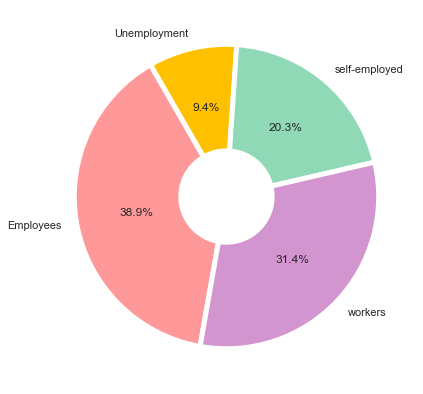

In [46]:
# 전체 총액 비율
df_by_employee = df.groupby("Employees_status").sum().reset_index()
plt.rcParams["figure.figsize"] = (7, 7)
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', "#50C8FF"]
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(df_by_employee["Amount_spent"], labels=df_by_employee["Employees_status"], autopct='%.1f%%', startangle=260, counterclock=False, colors=colors, wedgeprops=wedgeprops)
plt.show()

#### Plotly 파이 그래프

In [47]:
# 등급별로 그룹핑하여 총액 비율 파이 그래프
df_by_employee = df.groupby("Employees_status").sum().reset_index()
fig = px.pie(df_by_employee, values='Amount_spent', names='Employees_status', hole=.3)
fig.show()

### Faceted logistic regression - implot

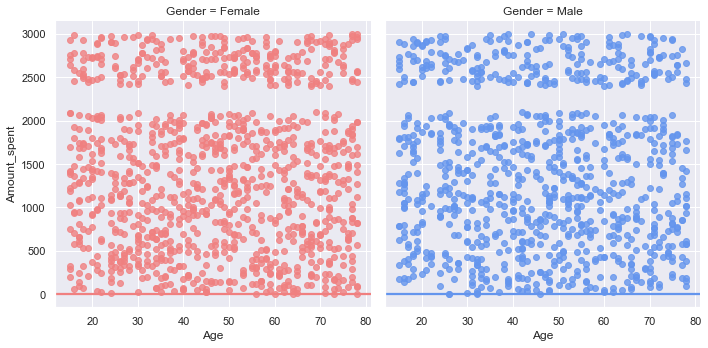

In [48]:
pal = dict(Male="#6495ED", Female="#F08080")
g = sns.lmplot(x="Age", y="Amount_spent", col="Gender", hue="Gender", data=df,
               palette=pal, y_jitter=.02, logistic=True, truncate=False)

### 회귀 분석

In [49]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [50]:
te = TransactionEncoder()
te_ary = te.fit(df).transform(df)
df_te = pd.DataFrame(te_ary, columns=te.columns_)
df_te

,A,D,E,G,I,M,P,R,S,T,...,l,m,n,o,p,r,s,t,u,y
0,False,True,False,False,True,False,False,False,False,True,...,False,False,True,True,False,True,True,True,False,False
1,False,False,False,True,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,...,True,False,False,False,False,True,True,True,True,False
4,False,False,False,False,False,False,False,False,True,False,...,False,True,True,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2042,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [51]:
itemsets = apriori(df_te, min_support=0.05, use_colnames=True)

In [52]:
itemsets

,support,itemsets


In [53]:
association_rules(itemsets, metric="lift", min_threshold=1)
# 지지도 0.05 이상이 하나도 없어서 개같이 멸망

ValueError: The input DataFrame `df` containing the frequent itemsets is empty.

### 상관관계 분석

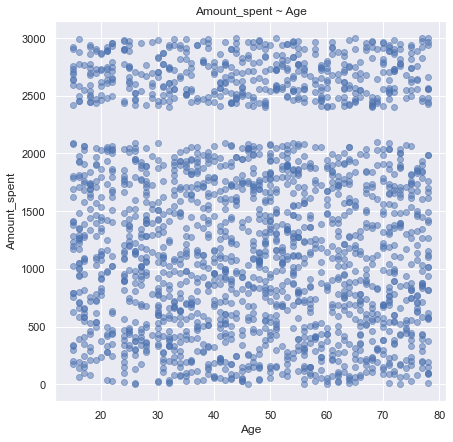

In [ ]:
# Age와 Amount_spent 상관 분석
X = df.Age.values
Y = df.Amount_spent.values 
plt.scatter(X, Y, alpha=0.5) 
plt.title('Amount_spent ~ Age') 
plt.xlabel('Age') 
plt.ylabel('Amount_spent') 
plt.show()
# 대각선으로 올라가거나 내려가면 양/음의 상관관계인 것
# 누가 봐도 관련 없어 보임

# 이재석

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'
%matplotlib inline

# 데이터셋 불러오기
cd = pd.read_csv("online_store_customer_data.csv")
cd

,Transaction_date,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent
0,1/1/2019,151200,Female,19.0,Single,Kansas,Basic,Unemployment,Other,1.0,2051.36
1,1/1/2019,151201,Male,49.0,Single,Illinois,Basic,self-employed,Card,0.0,544.04
2,1/1/2019,151202,Male,63.0,Married,New Mexico,Basic,workers,PayPal,1.0,1572.60
3,1/1/2019,151203,NaN,18.0,Single,Virginia,Platinum,workers,Card,1.0,1199.79
4,1/1/2019,151204,Male,27.0,Single,Connecticut,Basic,self-employed,Card,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2507,5/1/2021,153695,Female,57.0,Single,South Carolina,Platinum,self-employed,Card,0.0,150.10
2508,5/1/2021,153696,Female,36.0,Married,Hawaii,Silver,self-employed,PayPal,1.0,708.88
2509,5/1/2021,153697,Male,22.0,Single,South Carolina,Basic,workers,PayPal,1.0,2030.07
2510,5/1/2021,153698,NaN,44.0,Single,New York,Basic,Employees,PayPal,0.0,1909.77


In [ ]:
# 필요한 컬럼선별 및 결측지 제거.
cd = cd.loc[:, ['Transaction_date', 'Gender', 'Age', 'Marital_status', 'Segment', 'Employees_status', 'Amount_spent']]
cd.dropna(axis=0)

,Transaction_date,Gender,Age,Marital_status,Segment,Employees_status,Amount_spent
0,1/1/2019,Female,19.0,Single,Basic,Unemployment,2051.36
1,1/1/2019,Male,49.0,Single,Basic,self-employed,544.04
2,1/1/2019,Male,63.0,Married,Basic,workers,1572.60
5,1/3/2019,Male,71.0,Single,Basic,Employees,2922.66
6,1/3/2019,Female,34.0,Married,Platinum,Employees,1481.42
...,...,...,...,...,...,...,...
2506,4/30/2021,Male,34.0,Single,Missing,Employees,286.82
2507,5/1/2021,Female,57.0,Single,Platinum,self-employed,150.10
2508,5/1/2021,Female,36.0,Married,Silver,self-employed,708.88
2509,5/1/2021,Male,22.0,Single,Basic,workers,2030.07


In [ ]:
# 선별한 컬럼에서 등급이 플래티넘인 데이터 추출
found = cd['Segment'] == 'Platinum'
pt = cd[found]
print(pt)

     Transaction_date  Gender   Age Marital_status   Segment Employees_status  \
3            1/1/2019     NaN  18.0         Single  Platinum          workers   
6            1/3/2019  Female  34.0        Married  Platinum        Employees   
14           1/5/2019    Male  24.0        Married  Platinum    self-employed   
15           1/6/2019    Male  16.0         Single  Platinum          workers   
17           1/7/2019  Female  77.0        Married  Platinum          workers   
...               ...     ...   ...            ...       ...              ...   
2443         4/9/2021    Male  60.0        Married  Platinum        Employees   
2444        4/10/2021  Female  50.0        Married  Platinum    self-employed   
2469        4/19/2021  Female  25.0        Married  Platinum          workers   
2495        4/27/2021  Female  20.0        Married  Platinum        Employees   
2507         5/1/2021  Female  57.0         Single  Platinum    self-employed   

      Amount_spent  
3     

In [ ]:
# 선별한 컬럼에서 등급이 배이직인 데이터 추출
found = cd['Segment'] == 'Gold'
gd = cd[found]
print(gd)

     Transaction_date  Gender   Age Marital_status Segment Employees_status  \
9            1/4/2019  Female  41.0        Married    Gold     Unemployment   
33          1/14/2019    Male  15.0        Married    Gold    self-employed   
42          1/17/2019  Female  16.0         Single    Gold    self-employed   
43          1/18/2019  Female  63.0        Married    Gold          workers   
56          1/25/2019  Female  67.0         Single    Gold        Employees   
...               ...     ...   ...            ...     ...              ...   
2448        4/12/2021    Male  57.0        Married    Gold          workers   
2466        4/16/2021  Female  76.0        Married    Gold        Employees   
2468        4/18/2021  Female  73.0        Married    Gold        Employees   
2480        4/22/2021    Male  61.0         Single    Gold        Employees   
2483        4/23/2021    Male  73.0         Single    Gold          workers   

      Amount_spent  
9          2730.60  
33       

In [ ]:
# 선별한 컬럼에서 등급이 실버인 데이터 추출
found = cd['Segment'] == 'Silver'
sv = cd[found]
print(sv)

     Transaction_date  Gender   Age Marital_status Segment Employees_status  \
8            1/4/2019    Male  75.0        Married  Silver        Employees   
16           1/6/2019  Female  72.0        Married  Silver    self-employed   
21           1/8/2019    Male  42.0        Married  Silver          workers   
29          1/12/2019  Female  62.0        Married  Silver        Employees   
35          1/14/2019    Male  70.0        Married  Silver          workers   
...               ...     ...   ...            ...     ...              ...   
2498        4/28/2021  Female  55.0         Single  Silver     Unemployment   
2499        4/28/2021    Male  33.0        Married  Silver        Employees   
2501        4/29/2021  Female  65.0         Single  Silver     Unemployment   
2508         5/1/2021  Female  36.0        Married  Silver    self-employed   
2511         5/1/2021    Male  48.0         Single  Silver          workers   

      Amount_spent  
8          1046.20  
16       

In [ ]:
# 선별한 컬럼에서 등급이 배이직인 데이터 추출
found = cd['Segment'] == 'Basic'
bs = cd[found]
print(bs)

     Transaction_date  Gender   Age Marital_status Segment Employees_status  \
0            1/1/2019  Female  19.0         Single   Basic     Unemployment   
1            1/1/2019    Male  49.0         Single   Basic    self-employed   
2            1/1/2019    Male  63.0        Married   Basic          workers   
4            1/1/2019    Male  27.0         Single   Basic    self-employed   
5            1/3/2019    Male  71.0         Single   Basic        Employees   
...               ...     ...   ...            ...     ...              ...   
2503        4/29/2021    Male  67.0         Single   Basic        Employees   
2504        4/30/2021    Male  34.0        Married   Basic    self-employed   
2505        4/30/2021    Male  54.0        Married   Basic        Employees   
2509         5/1/2021    Male  22.0         Single   Basic          workers   
2510         5/1/2021     NaN  44.0         Single   Basic        Employees   

      Amount_spent  
0          2051.36  
1        

45.68036529680365
47.33471074380165
45.78125
47.09310653536258


<BarContainer object of 4 artists>

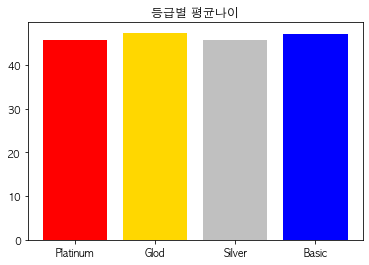

In [ ]:
# 각 등급별 평균나이
print(np.mean(pt['Age']))
print(np.mean(gd['Age']))
print(np.mean(sv['Age']))
print(np.mean(bs['Age']))

x = ['Platinum', 'Glod', 'Silver', 'Basic']
ptm = [np.mean(pt['Age']) , np.mean(gd['Age']), np.mean(sv['Age']), np.mean(bs['Age'])]
plt.title("등급별 평균나이")
plt.bar(x, ptm, color=['r', 'gold', 'silver', 'b'])

1455.118730964467
1389.5272272727273
1411.8759122401848
1411.7301826923076


<BarContainer object of 4 artists>

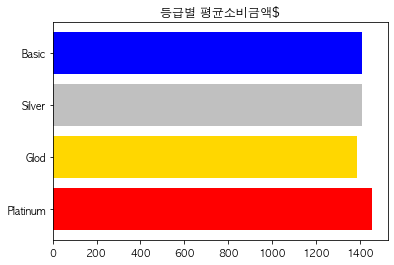

In [ ]:
# 각 등급별 평균 소비금액
print(np.mean(pt['Amount_spent']))
print(np.mean(gd['Amount_spent']))
print(np.mean(sv['Amount_spent']))
print(np.mean(bs['Amount_spent']))

x = ['Platinum', 'Glod', 'Silver', 'Basic']
ptm = [np.mean(pt['Amount_spent']), np.mean(gd['Amount_spent']), np.mean(sv['Amount_spent']), np.mean(bs['Amount_spent'])]
plt.title("등급별 평균소비금액$")
plt.barh(x, ptm, color=['r', 'gold', 'silver', 'b'])

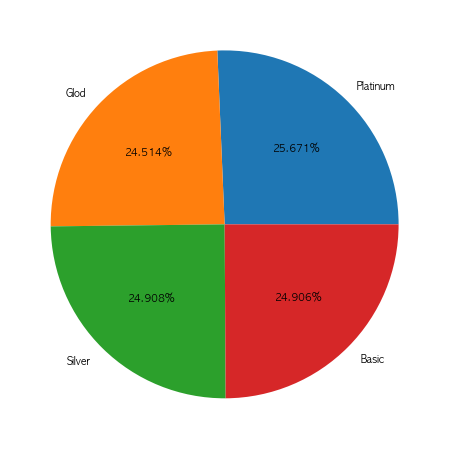

In [ ]:
x = [np.mean(pt['Amount_spent']), np.mean(gd['Amount_spent']), np.mean(sv['Amount_spent']), np.mean(bs['Amount_spent'])]
labels = ['Platinum', 'Glod', 'Silver', 'Basic']
fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
plt.pie(x, labels=labels, autopct='%.3f%%')
plt.show()

In [ ]:
# 플래티넘 등급 성비 합
pt1 = pt.groupby(['Gender']).count()
pt1

,Transaction_date,Age,Marital_status,Segment,Employees_status,Amount_spent
Gender,,,,,,
Female,236,233,236,236,235,209
Male,202,200,202,202,200,181


<BarContainer object of 2 artists>

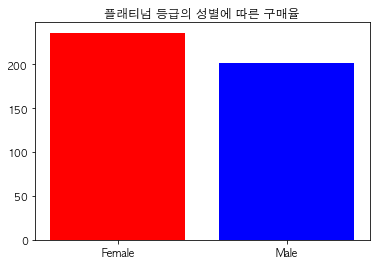

In [ ]:
# 플레티넘 등급 성비 구매율
x = ['Female', 'Male']
plt.title('플래티넘 등급의 성별에 따른 구매율')
plt.bar(x, pt1['Transaction_date'], color=['r', 'b'])

In [ ]:
# 플래티넘 등급 성별 평균값
pt2 = pt.groupby(['Gender']).mean()
pt2

,Age,Amount_spent
Gender,,
Female,47.012876,1413.755933
Male,44.350000,1499.092155


<BarContainer object of 2 artists>

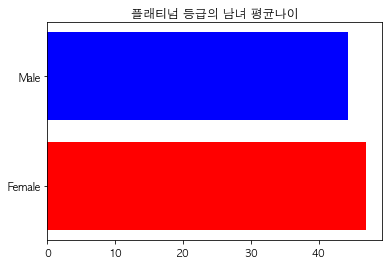

In [ ]:
# 플래티넘 등급의 남녀 평균나이
x = ['Female', 'Male']
plt.title('플래티넘 등급의 남녀 평균나이')
plt.barh(x, pt2['Age'], color=['r', 'b'])

<BarContainer object of 2 artists>

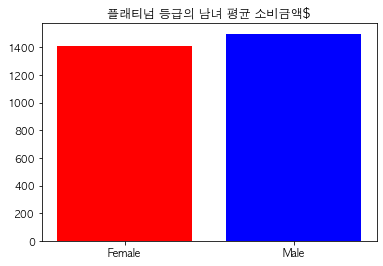

In [ ]:
# 플래티넘 등급의 남녀 평균소비금액
x = ['Female', 'Male']
plt.title('플래티넘 등급의 남녀 평균 소비금액$')
plt.bar(x, pt2['Amount_spent'], color=['r', 'b'])
# 플래티넘 등급의 구매율은 여성이 더 많지만 소비금액은 남성이 더 높다.

In [ ]:
# 실버 등급 성비 합
sv1 = sv.groupby('Gender').count()
sv1

,Transaction_date,Age,Marital_status,Segment,Employees_status,Amount_spent
Gender,,,,,,
Female,271,263,271,271,269,233
Male,214,212,214,214,213,195


<BarContainer object of 2 artists>

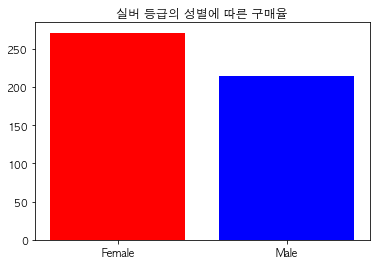

In [ ]:
# 실버 등급의 구매성비
x = ['Female', 'Male']
plt.title('실버 등급의 성별에 따른 구매율')
plt.bar(x, sv1['Transaction_date'], color=['r','b'])

In [ ]:
sv2 = sv.groupby('Gender').mean()
sv2

,Age,Amount_spent
Gender,,
Female,45.429658,1428.105150
Male,46.037736,1396.263897


<BarContainer object of 2 artists>

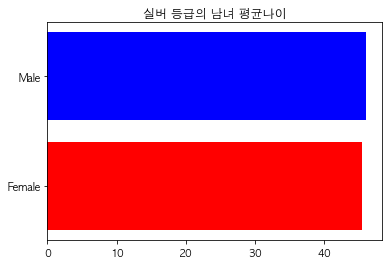

In [ ]:
# 실버 등급의 남녀 평균나이
x = ['Female', 'Male']
plt.title('실버 등급의 남녀 평균나이')
plt.barh(x, sv2['Age'], color=['r','b'])
# 플래티넘에 비해 실버는 남성의 비율이 높다.

<BarContainer object of 2 artists>

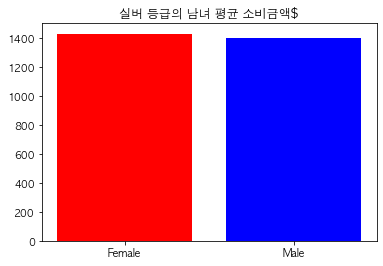

In [ ]:
# 실버 등급의 남녀 평균소비금액
x = ['Female', 'Male']
plt.title('실버 등급의 남녀 평균 소비금액$')
plt.bar(x, sv2['Amount_spent'], color=['r','b'])
# 실버의 경우 여성의 소비 금액이 더 높다.

In [ ]:
bs1 = bs.groupby(['Gender']).count()
bs1

,Transaction_date,Age,Marital_status,Segment,Employees_status,Amount_spent
Gender,,,,,,
Female,616,603,616,616,605,560
Male,507,501,507,507,504,468


<BarContainer object of 2 artists>

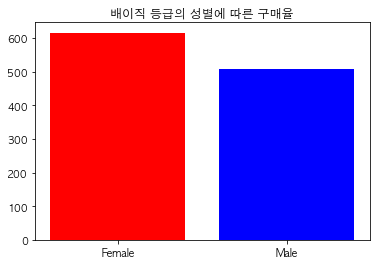

In [ ]:
# 배이직 등급의 구매성비
x = ['Female', 'Male']
plt.title('배이직 등급의 성별에 따른 구매율')
plt.bar(x, bs1['Transaction_date'], color=['r','b'])

In [ ]:
bs2 = bs.groupby('Gender').mean()
bs2

,Age,Amount_spent
Gender,,
Female,47.524046,1419.099214
Male,46.812375,1410.688611


<BarContainer object of 2 artists>

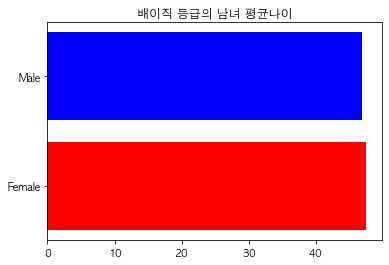

In [ ]:
# 배이직 등급의 남녀 평균나이
x = ['Female', 'Male']
plt.title('배이직 등급의 남녀 평균나이')
plt.barh(x, bs2['Age'], color=['r','b'])

<BarContainer object of 2 artists>

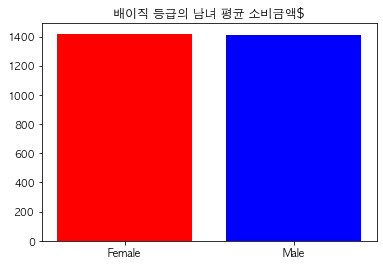

In [ ]:
# 배이직 등급의 남녀 평균소비금액
x = ['Female', 'Male']
plt.title('배이직 등급의 남녀 평균 소비금액$')
plt.bar(x, bs2['Amount_spent'], color=['r','b'])
# 구매 비율은 여성이 높지만 소비금액은 남성과 차이가 많이나지 않는다

In [ ]:
pte = pt.groupby('Employees_status').count()
pte

,Transaction_date,Gender,Age,Marital_status,Segment,Amount_spent
Employees_status,,,,,,
Employees,148,146,148,148,148,131
Unemployment,52,52,51,52,52,42
self-employed,86,85,84,86,86,78
workers,154,152,152,154,154,140


<BarContainer object of 4 artists>

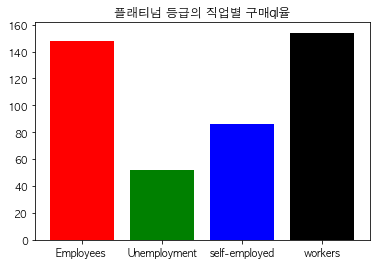

In [ ]:
# 플래티넘 등급의 직업별 구매비율
x = ['Employees	', 'Unemployment', 'self-employed', 'workers']
plt.title('플래티넘 등급의 직업별 구매ql율')
plt.bar(x, pte['Transaction_date'], color=['r', 'g','b', 'black'])

([<matplotlib.patches.Wedge at 0x13057d190>,
 [Text(0.54090619591363, 0.9578206968019881, 'Employees'),
  Text(-0.8710924982433975, 0.6717126316395106, 'Unemployment'),
  Text(-1.0412016200054495, -0.3548227536362735, 'self-employed'),
  Text(0.4993896139484799, -0.9801071438778459, 'workers')],
 [Text(0.2950397432256163, 0.5224476528010844, '33.6%'),
  Text(-0.4751413626782167, 0.3663887081670057, '11.8%'),
  Text(-0.5679281563666088, -0.19353968380160372, '19.5%'),
  Text(0.272394334880989, -0.5346038966606431, '35.0%')])

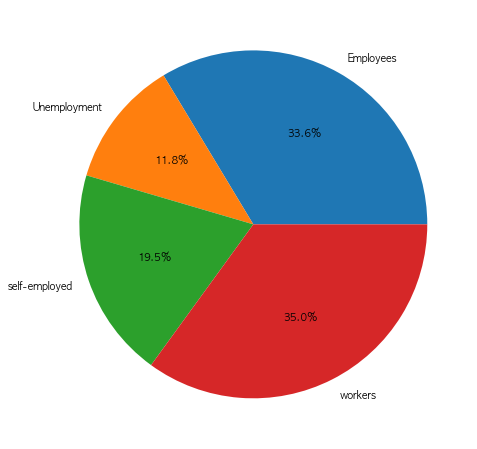

In [ ]:
labels = ['Employees', 'Unemployment', 'self-employed', 'workers']
fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
plt.pie(pte['Transaction_date'], labels=labels, autopct='%.1f%%')

In [ ]:
pte1 = pt.groupby('Employees_status').mean()
pte1

,Age,Amount_spent
Employees_status,,
Employees,48.033784,1540.238626
Unemployment,40.294118,1525.281905
self-employed,42.785714,1409.122051
workers,46.835526,1385.354786


<BarContainer object of 4 artists>

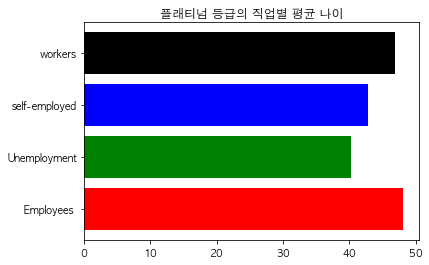

In [ ]:
# 플래티넘 등급의 직업별 평균나이
x = ['Employees	', 'Unemployment', 'self-employed', 'workers']
plt.title('플래티넘 등급의 직업별 평균 나이')
plt.barh(x, pte1['Age'], color=['r', 'g','b', 'black'])

<BarContainer object of 4 artists>

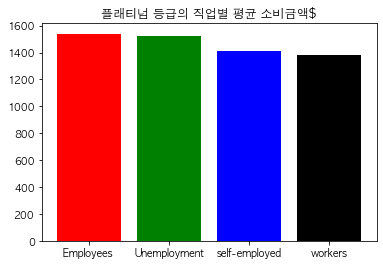

In [ ]:
# 플래티넘 등급의 직업별 평균 소비금액
x = ['Employees	', 'Unemployment', 'self-employed', 'workers']
plt.title('플래티넘 등급의 직업별 평균 소비금액$')
plt.bar(x, pte1['Amount_spent'], color=['r', 'g','b', 'black'])
# 플래티넘 등급의 무직인 구매자의 소비금액이 구매율에 비해 높다

In [ ]:
sve = sv.groupby('Employees_status').count()
sve

,Transaction_date,Gender,Age,Marital_status,Segment,Amount_spent
Employees_status,,,,,,
Employees,194,191,189,194,194,171
Unemployment,49,49,49,49,49,40
self-employed,88,87,87,88,88,80
workers,156,155,152,156,156,139


<BarContainer object of 4 artists>

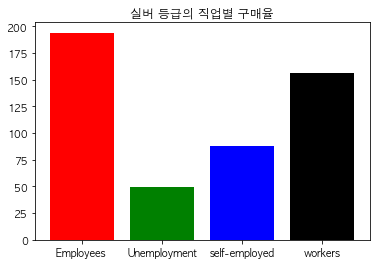

In [ ]:
# 실버 등급의 직업별 구매율
x = ['Employees	', 'Unemployment', 'self-employed', 'workers']
plt.title('실버 등급의 직업별 구매율')
plt.bar(x, sve['Transaction_date'], color=['r', 'g','b', 'black'])

In [ ]:
sve1 = sv.groupby('Employees_status').mean()
sve1

,Age,Amount_spent
Employees_status,,
Employees,45.555556,1490.157544
Unemployment,46.367347,1173.058500
self-employed,44.436782,1377.877750
workers,46.743421,1412.427194


<BarContainer object of 4 artists>

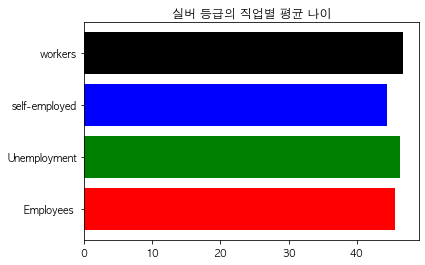

In [ ]:
# 실버 등급의 직업별 평균나이
x = ['Employees	', 'Unemployment', 'self-employed', 'workers']
plt.title('실버 등급의 직업별 평균 나이')
plt.barh(x, sve1['Age'], color=['r', 'g','b', 'black'])

<BarContainer object of 4 artists>

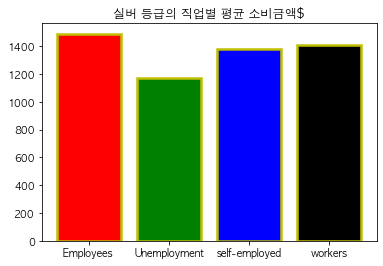

In [ ]:
# 실버 등급의 직업별 평균 소비금액
x = ['Employees	', 'Unemployment', 'self-employed', 'workers']
plt.title('실버 등급의 직업별 평균 소비금액$')
plt.bar(x, sve1['Amount_spent'], color=['r', 'g','b', 'black'],edgecolor = 'y', linewidth = 2.5)

In [ ]:
bse = bs.groupby('Employees_status').count()
bse

,Transaction_date,Gender,Age,Marital_status,Segment,Amount_spent
Employees_status,,,,,,
Employees,428,426,421,428,428,395
Unemployment,117,115,116,117,117,103
self-employed,227,226,224,227,227,209
workers,349,342,341,349,349,319


<BarContainer object of 4 artists>

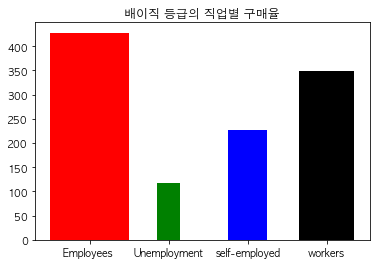

In [ ]:
# 배이직 등급의 직업별 구매율
x = ['Employees	', 'Unemployment', 'self-employed', 'workers']
plt.title('배이직 등급의 직업별 구매율')
plt.bar(x, bse['Transaction_date'], color=['r', 'g','b', 'black'], width =[1, 0.3, 0.5, 0.7])

In [ ]:
bse1 = bs.groupby('Employees_status').mean()
bse1

,Age,Amount_spent
Employees_status,,
Employees,47.688836,1396.921848
Unemployment,44.267241,1397.269806
self-employed,46.964286,1501.684450
workers,47.668622,1382.620972


<BarContainer object of 4 artists>

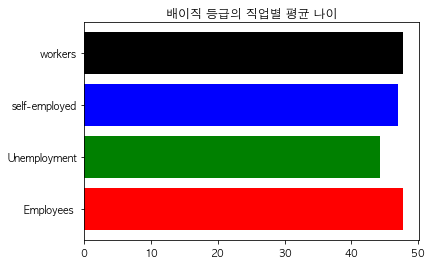

In [ ]:
# 배이직 등급의 직업별 평균나이
x = ['Employees	', 'Unemployment', 'self-employed', 'workers']
plt.title('배이직 등급의 직업별 평균 나이')
plt.barh(x, bse1['Age'], color=['r', 'g','b', 'black'])

<BarContainer object of 4 artists>

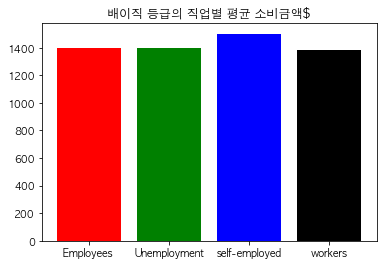

In [ ]:
# 배이직 등급의 직업별 평균 소비금액
x = ['Employees	', 'Unemployment', 'self-employed', 'workers']
plt.title('배이직 등급의 직업별 평균 소비금액$')
plt.bar(x, bse1['Amount_spent'], color=['r', 'g','b', 'black'])
# 배이직 등급은 구매율이 낮은 무직과 자영업자의 소비금액이 높다.

In [ ]:
# 연도별로 검색을 위해 데이터타임 타입의 컬럼을 새로 만들고 인덱스로 지정
cd['date'] = pd.to_datetime(cd['Transaction_date'])
cdi = cd.set_index('date')
cdi2019 = cdi['2019']
cdi2020 = cdi['2020']

/var/folders/j6/m7t5m6h978134_qwyw9q1nw00000gn/T/ipykernel_1214/2199224436.py:4: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  cdi2019 = cdi['2019']
/var/folders/j6/m7t5m6h978134_qwyw9q1nw00000gn/T/ipykernel_1214/2199224436.py:5: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  cdi2020 = cdi['2020']


In [ ]:
# 2019년 등급별 합
ci19 = cdi2019.groupby('Segment').count()
ci19

,Transaction_date,Gender,Age,Marital_status,Employees_status,Amount_spent
Segment,,,,,,
Basic,516,509,507,516,510,469
Gold,118,115,116,118,116,102
Missing,80,78,79,80,80,74
Platinum,188,184,187,188,186,162
Silver,204,200,201,204,202,183


<BarContainer object of 5 artists>

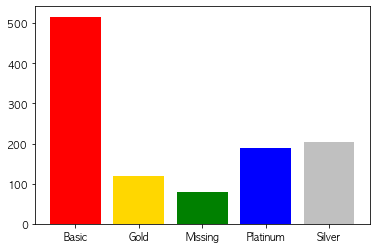

In [ ]:
# 2019년 등급별 구매율
x = ['Basic', 'Gold', 'Missing', 'Platinum', 'Silver']
plt.bar(x, ci19['Transaction_date'],color=['r', 'gold', 'g', 'b', 'silver'])

([<matplotlib.patches.Wedge at 0x130aee250>,
 [Text(-1.093930461424318, 0.11539560463024164, 'Basic'),
  Text(0.13712259428309917, -1.0914198981771739, 'Gold'),
  Text(0.6979836054621852, -0.850187559604355, 'Missing'),
  Text(1.091805003284741, -0.1340217698823845, 'Platinum'),
  Text(0.602331130782529, 0.9204331637279484, 'Silver')],
 [Text(-0.5966893425950824, 0.06294305707104088, '46.7%'),
  Text(0.07479414233623591, -0.5953199444602766, '10.7%'),
  Text(0.38071833025210094, -0.4637386688751027, '7.2%'),
  Text(0.5955300017916769, -0.07310278357220973, '17.0%'),
  Text(0.3285442531541067, 0.5020544529425173, '18.4%')])

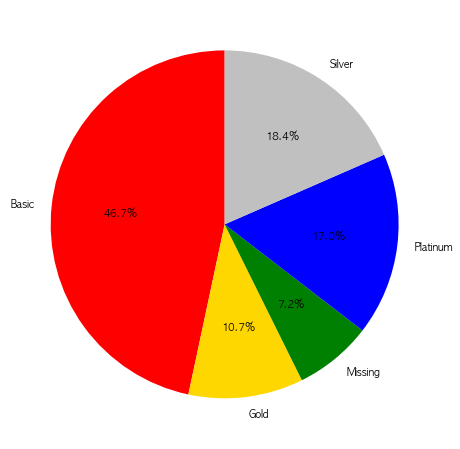

In [ ]:
labels = ['Basic', 'Gold', 'Missing', 'Platinum', 'Silver']
fig = plt.figure(figsize=(8,8)) # 배경 생성
fig.set_facecolor('white') # 배경색 하얀색으로 설정
plt.pie(ci19['Transaction_date'], startangle=90, labels=labels, autopct="%.1f%%", colors=['r', 'gold', 'g', 'b', 'silver'])

In [ ]:
# 2020년 등급별 합
ci20 = cdi2020.groupby('Segment').count()
ci20

,Transaction_date,Gender,Age,Marital_status,Employees_status,Amount_spent
Segment,,,,,,
Basic,461,457,453,461,456,423
Gold,97,97,95,97,95,89
Missing,90,90,88,90,89,84
Platinum,202,201,198,202,201,183
Silver,202,201,197,202,202,179


<BarContainer object of 5 artists>

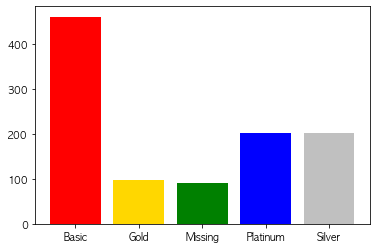

In [ ]:
# 2020년 등급별 구매율
x = ['Basic', 'Gold', 'Missing', 'Platinum', 'Silver']
plt.bar(x, ci20['Transaction_date'],color=['r', 'gold', 'g', 'b', 'silver'])

([<matplotlib.patches.Wedge at 0x130ba1e20>,
 [Text(-1.0793417486230181, 0.21218244432423117, 'Basic'),
  Text(-0.10822746284497614, -1.094662877915452, 'Gold'),
  Text(0.4882354345899216, -0.9857109923353754, 'Missing'),
  Text(1.0687576129070484, -0.2603020646349694, 'Platinum'),
  Text(0.6240390614004653, 0.9058560867193124, 'Silver')],
 [Text(-0.5887318628852826, 0.1157358787223079, '43.8%'),
  Text(-0.05903316155180516, -0.5970888424993374, '9.2%'),
  Text(0.2663102370490481, -0.5376605412738411, '8.6%'),
  Text(0.5829586979492991, -0.14198294434634695, '19.2%'),
  Text(0.34038494258207197, 0.4941033200287158, '19.2%')])

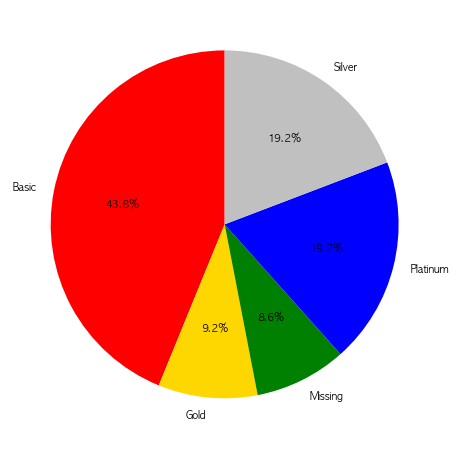

In [ ]:
labels = ['Basic', 'Gold', 'Missing', 'Platinum', 'Silver']
fig = plt.figure(figsize=(8,8)) # 배경 생성
fig.set_facecolor('white') # 배경색 하얀색으로 설정
plt.pie(ci20['Transaction_date'], startangle=90, labels=labels, autopct="%.1f%%", colors=['r', 'gold', 'g', 'b', 'silver'])

# 최지욱

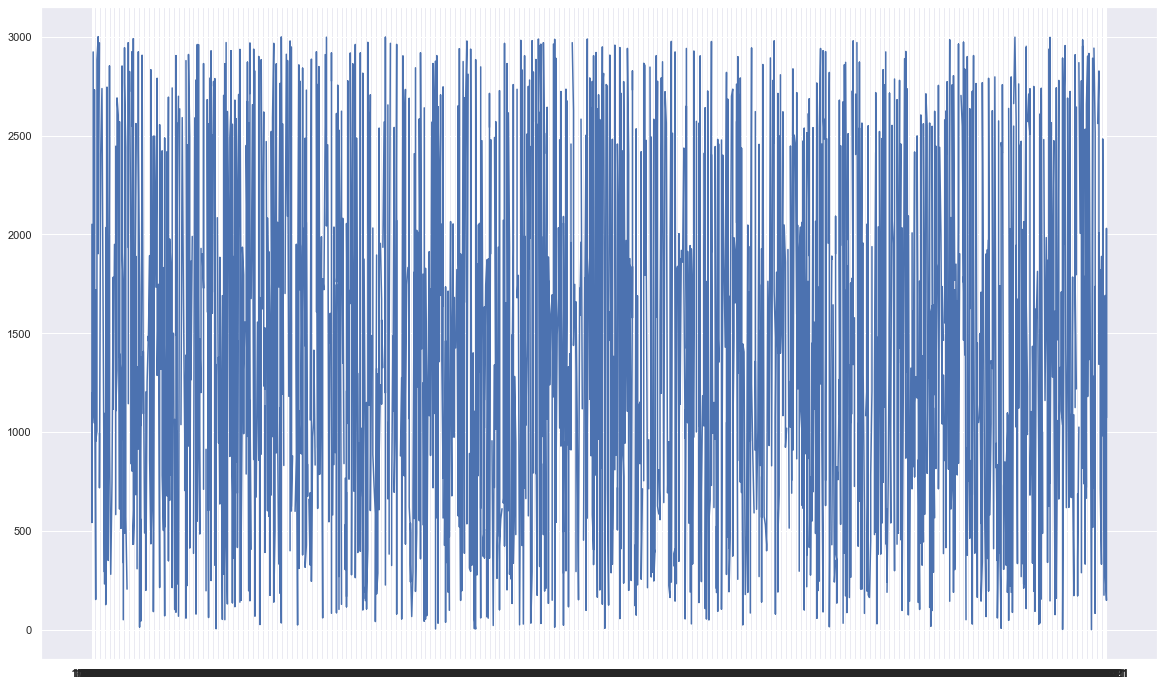

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("online_store_customer_data.csv", index_col=0, engine='python')
#csv reading
fig = plt.figure(figsize=(20, 12)) # 차트 생성 및 사이즈 설정
ax = fig.add_subplot(1,1,1) #axis

ax.plot(df['Amount_spent'], label='df', color='b')

#dataset의 Amount_spent를 아무 생각 없이 그래프로 나타내어 봄.
#시간도 굉장히 오래 걸리고 알아볼 수 조차 없다.

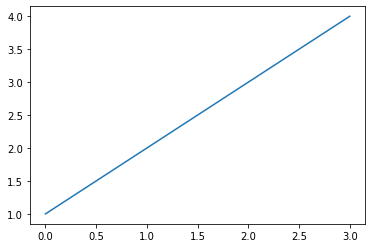

In [ ]:
import matplotlib.pyplot as plt

plt.plot([1, 2, 3, 4])
plt.show()

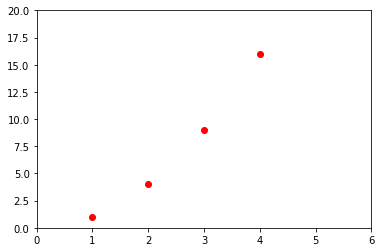

In [ ]:
import matplotlib.pyplot as plt

plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro') # 1st x, 2nd y, 3rd Format string
plt.axis([0, 6, 0, 20]) # Setting axis to set the range of min and max of x,y
plt.show() 

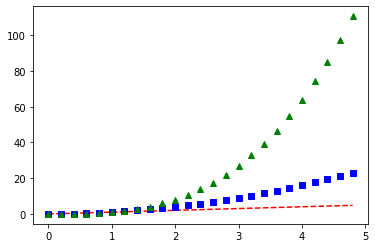

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 200ms 간격으로 균일하게 샘플된 시간
t = np.arange(0., 5., 0.2) #numpy, sampling regularly time of 0.2 sec

# 빨간 대쉬, 파란 사각형, 녹색 삼각형
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
#               red --          blue square    green triangle
plt.show()


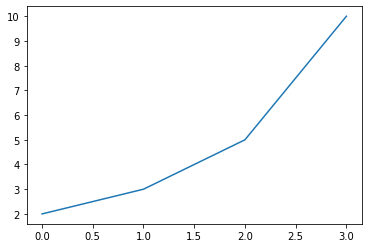

In [ ]:
import matplotlib.pyplot as plt

plt.plot([2, 3, 5, 10]) 
# Single list is recognized as y-values and x-values are automatically set as [1,2,3,4]
plt.show()

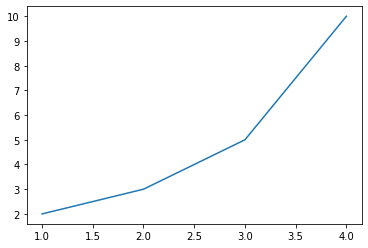

In [ ]:
import matplotlib.pyplot as plt

plt.plot([1, 2, 3, 4], [2, 3, 5, 10])
# 1st value is x, 2nd is y. same as upper graph
plt.show()

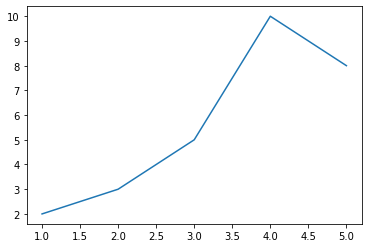

In [ ]:
import matplotlib.pyplot as plt

data_dict = {'data_x': [1, 2, 3, 4, 5], 'data_y': [2, 3, 5, 10, 8]}
# Setting data_x as a dictionary. data_x is a key, list [12345] is value.
plt.plot('data_x', 'data_y', data=data_dict) # Setting data parameter as data_dict
plt.show()

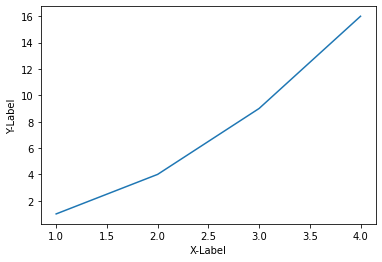

In [ ]:
import matplotlib.pyplot as plt

plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.xlabel('X-Label') # Setting x_value's label as X-Label
plt.ylabel('Y-Label') # Setting y_value's label as Y-Label
plt.show()

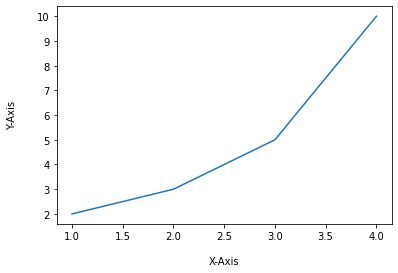

In [ ]:
import matplotlib.pyplot as plt
#Padding(여백)

plt.plot([1, 2, 3, 4], [2, 3, 5, 10])
plt.xlabel('X-Axis', labelpad=15) # Setting x_value's label as X-Axis and pad 15
plt.ylabel('Y-Axis', labelpad=20) # Setting y_value's label as Y-Axis and pad 20
plt.show()

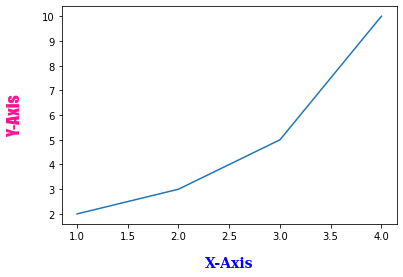

In [ ]:
import matplotlib.pyplot as plt
# Setting font
font1 = {'family': 'serif',
        'color': 'b',
        'weight': 'bold',
        'size': 14
        }

font2 = {'family': 'fantasy',
        'color': 'deeppink',
        'weight': 'normal',
        'size': 'xx-large'
        }

plt.plot([1, 2, 3, 4], [2, 3, 5, 10])
plt.xlabel('X-Axis', labelpad=15, fontdict=font1)
plt.ylabel('Y-Axis', labelpad=20, fontdict=font2)
plt.show()

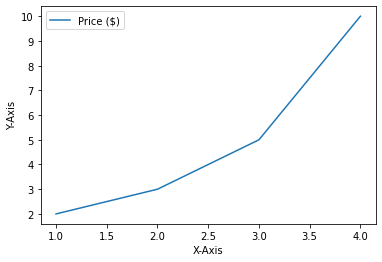

In [ ]:
import matplotlib.pyplot as plt

plt.plot([1, 2, 3, 4], [2, 3, 5, 10], label='Price ($)') # x,y values labeled as Price
plt.xlabel('X-Axis') # Label
plt.ylabel('Y-Axis') # Label
plt.legend() #범례 표시 함수

plt.show()

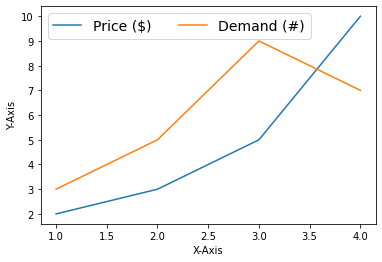

In [ ]:
import matplotlib.pyplot as plt

plt.plot([1, 2, 3, 4], [2, 3, 5, 10], label='Price ($)')
plt.plot([1, 2, 3, 4], [3, 5, 9, 7], label='Demand (#)')
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
# plt.legend(loc='best')
plt.legend(loc='best', ncol=2, fontsize=14)

plt.show()

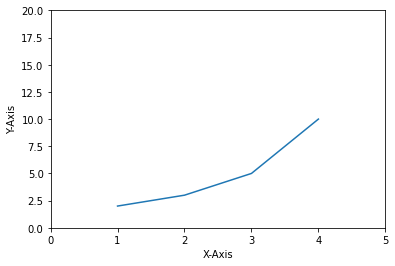

In [ ]:
import matplotlib.pyplot as plt

plt.plot([1, 2, 3, 4], [2, 3, 5, 10])
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
plt.xlim([0, 5])      # X축의 범위: [xmin, xmax]
plt.ylim([0, 20])     # Y축의 범위: [ymin, ymax]

plt.show()

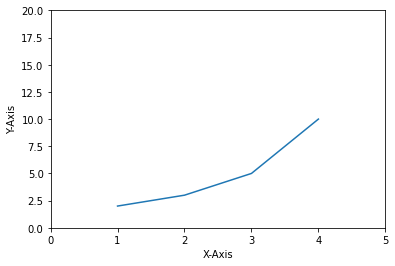

In [ ]:
import matplotlib.pyplot as plt

plt.plot([1, 2, 3, 4], [2, 3, 5, 10])
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
plt.axis([0, 5, 0, 20])  # X, Y축의 범위: [xmin, xmax, ymin, ymax]
#axis() 함수에 [xmin, xmax, ymin, ymax]의 형태로 X, Y축의 범위를 지정
plt.show()

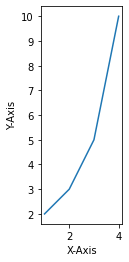

In [ ]:
import matplotlib.pyplot as plt

plt.plot([1, 2, 3, 4], [2, 3, 5, 10])
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
# plt.axis('square') #축의 길이 동일
plt.axis('scaled')  #축의 길이가 동일 비율로(스케일) 조정


plt.show()

(0.85, 4.15) (1.6, 10.4)
(0.85, 9.65, 1.6, 10.4)


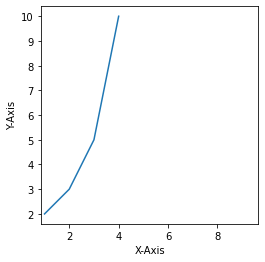

In [ ]:
import matplotlib.pyplot as plt

plt.plot([1, 2, 3, 4], [2, 3, 5, 10])
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')

x_range, y_range = plt.xlim(), plt.ylim()
print(x_range, y_range)

axis_range = plt.axis('square')
print(axis_range)

plt.show()

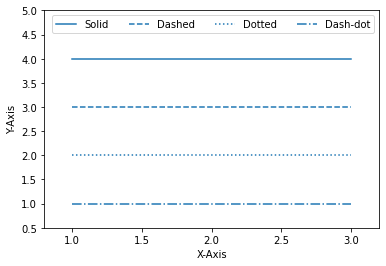

In [ ]:
import matplotlib.pyplot as plt

plt.plot([1, 2, 3], [4, 4, 4], '-', color='C0', label='Solid') #단단한(solid) 선
plt.plot([1, 2, 3], [3, 3, 3], '--', color='C0', label='Dashed')#Dash 여러개
plt.plot([1, 2, 3], [2, 2, 2], ':', color='C0', label='Dotted') #Dot...점선
plt.plot([1, 2, 3], [1, 1, 1], '-.', color='C0', label='Dash-dot')# -.Dash & Dot
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
plt.axis([0.8, 3.2, 0.5, 5.0])
plt.legend(loc='upper right', ncol=4) #location = 우상단 ncol에 4개
plt.show()

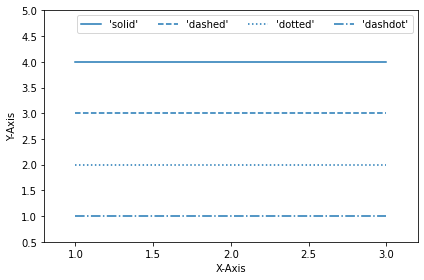

In [ ]:
import matplotlib.pyplot as plt

plt.plot([1, 2, 3], [4, 4, 4], linestyle='solid', color='C0', label="'solid'")
#        X_value    Y_value    Line style         color       label
plt.plot([1, 2, 3], [3, 3, 3], linestyle='dashed', color='C0', label="'dashed'")
plt.plot([1, 2, 3], [2, 2, 2], linestyle='dotted', color='C0', label="'dotted'")
plt.plot([1, 2, 3], [1, 1, 1], linestyle='dashdot', color='C0', label="'dashdot'")
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
plt.axis([0.8, 3.2, 0.5, 5.0])
plt.legend(loc='upper right', ncol=4)
plt.tight_layout() #대충 padding을 딱 붙여 주는 듯.
plt.show()

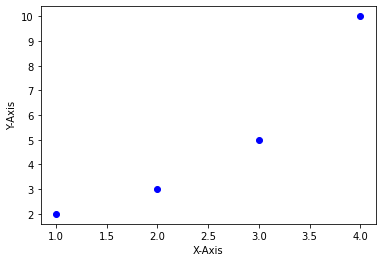

In [ ]:
import matplotlib.pyplot as plt

plt.plot([1, 2, 3, 4], [2, 3, 5, 10], 'bo') # blue + o (circle)
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
plt.show()

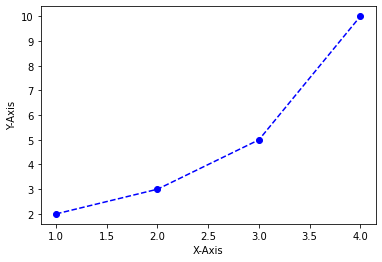

In [ ]:
import matplotlib.pyplot as plt

# plt.plot([1, 2, 3, 4], [2, 3, 5, 10], 'bo-')    # blue + o (circle) + solid
plt.plot([1, 2, 3, 4], [2, 3, 5, 10], 'bo--')     # blue + o (circle) + dash
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
plt.show()

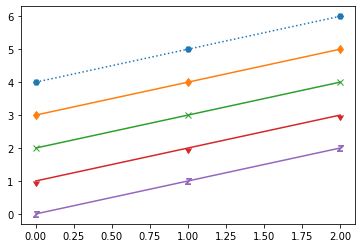

In [ ]:
import matplotlib.pyplot as plt

plt.plot([4, 5, 6], marker="H",linestyle='dotted') #line, label 등 추가 가능
plt.plot([3, 4, 5], marker="d")
plt.plot([2, 3, 4], marker="x")
plt.plot([1, 2, 3], marker=11)
plt.plot([0, 1, 2], marker='$Z$')
plt.show()

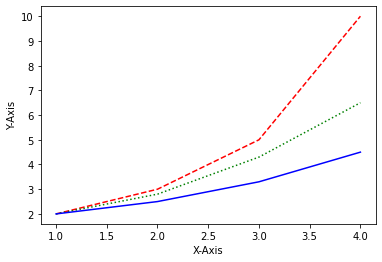

In [ ]:
import matplotlib.pyplot as plt

plt.plot([1, 2, 3, 4], [2.0, 3.0, 5.0, 10.0], 'r--')
plt.plot([1, 2, 3, 4], [2.0, 2.8, 4.3, 6.5], 'g:')
plt.plot([1, 2, 3, 4], [2.0, 2.5, 3.3, 4.5], 'b')
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')

plt.show()

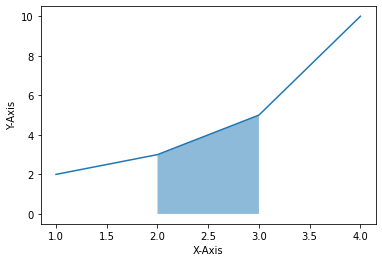

In [ ]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4] #미리 초기화 및 선언 해두고 plot()함수로 갖다 쓰기
y = [2, 3, 5, 10]

plt.plot(x, y) 
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
plt.fill_between(x[1:3], y[1:3], alpha=0.5) #채운다_사이(x[1], y[1]),(x[2],y[2])

plt.show()

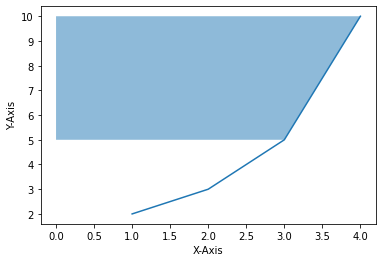

In [ ]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4]
y = [2, 3, 5, 10]

plt.plot(x, y)
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
plt.fill_betweenx(y[2:4], x[2:4], alpha=0.5)

plt.show()

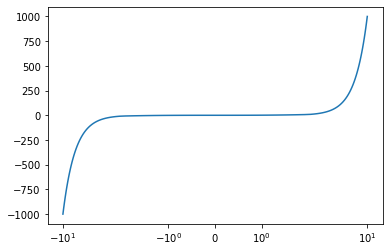

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-10, 10, 100) #Start at -10, Stop at 10, num is 100
y = x ** 3

plt.plot(x, y)
plt.xscale('symlog') #symmetrical log

plt.show()

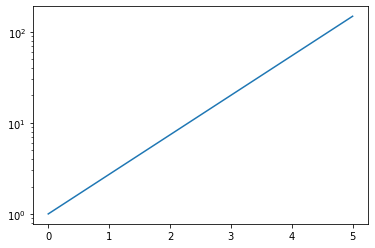

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 5, 100) #Start at 0, Stop at 5, num is 100
y = np.exp(x)

plt.plot(x, y)
# plt.yscale('linear')
plt.yscale('log')

plt.show()

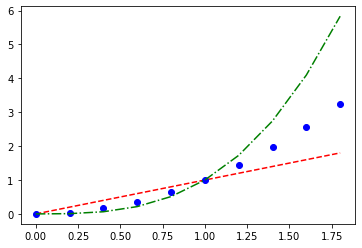

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0, 2, 0.2) #0에서, 2까지, 0.2 간격으로
# [ 0. 0.2 0.4 0.6 0.8 1. 1.2 1.4 1.6 1.8]

plt.plot(x, x, 'r--', x, x**2, 'bo', x, x**3, 'g-.')
#       x 값, y 값, 스타일 * 3
plt.show()

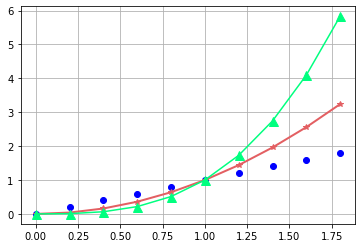

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0, 2, 0.2)

plt.plot(x, x, 'bo')
plt.plot(x, x**2, color='#e35f62', marker='*', linewidth=2)
plt.plot(x, x**3, color='springgreen', marker='^', markersize=9)
plt.grid(True) #그냥 TRUE만 하면 그리드 표시됨. 쉽다.

plt.show()

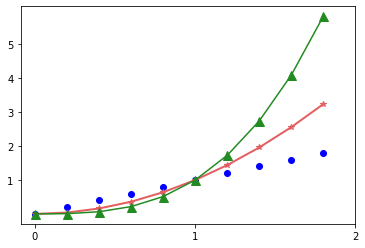

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 2, 0.2)

plt.plot(x, x, 'bo')
plt.plot(x, x**2, color='#e35f62', marker='*', linewidth=2)
plt.plot(x, x**3, color='forestgreen', marker='^', markersize=9)
plt.xticks([0, 1, 2]) #xticks 함수로 x축의 눈금 정함
plt.yticks(np.arange(1, 6)) #yticks 함수로 y축의 눈금 정함

plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# 기본 csv 파일 불러오기
# df = pd.read_csv("C:/Bigdata/work/Project01/online_store_customer_data.csv")

# Gender를 인덱스 칼럼으로 하여 불러오기
df = pd.read_csv("C:/Bigdata/work/Project01/online_store_customer_data.csv", index_col='Gender')

df.describe()

,Transaction_ID,Age,Referal,Amount_spent
count,2512.000000,2470.000000,2357.000000,2270.000000
mean,152443.931131,46.637652,0.652100,1418.422577
std,724.580482,18.186277,0.476405,878.507451
min,151200.000000,15.000000,0.000000,2.090000
25%,151815.750000,32.000000,0.000000,678.192500
50%,152443.500000,47.000000,1.000000,1341.435000
75%,153071.250000,62.000000,1.000000,2038.102500
max,153699.000000,78.000000,1.000000,2999.980000


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

age_sp = df.groupby('Age')['Amount_spent'].mean()
#나이당-쓴 돈.평균()
 
age_sp

Age
15.0    1533.035405
16.0    1413.052558
17.0    1161.580968
18.0    1707.077143
19.0    1555.736667
           ...     
74.0    1078.958000
75.0    1460.041395
76.0    1418.097333
77.0    1304.313824
78.0    1430.301250
Name: Amount_spent, Length: 63, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Amount_spent'>

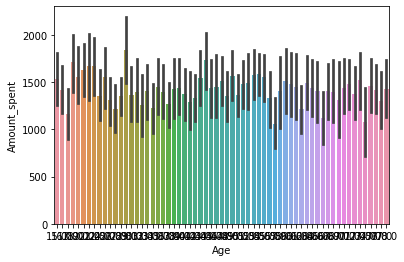

In [ ]:
sb.barplot(x='Age', y='Amount_spent', data = df)

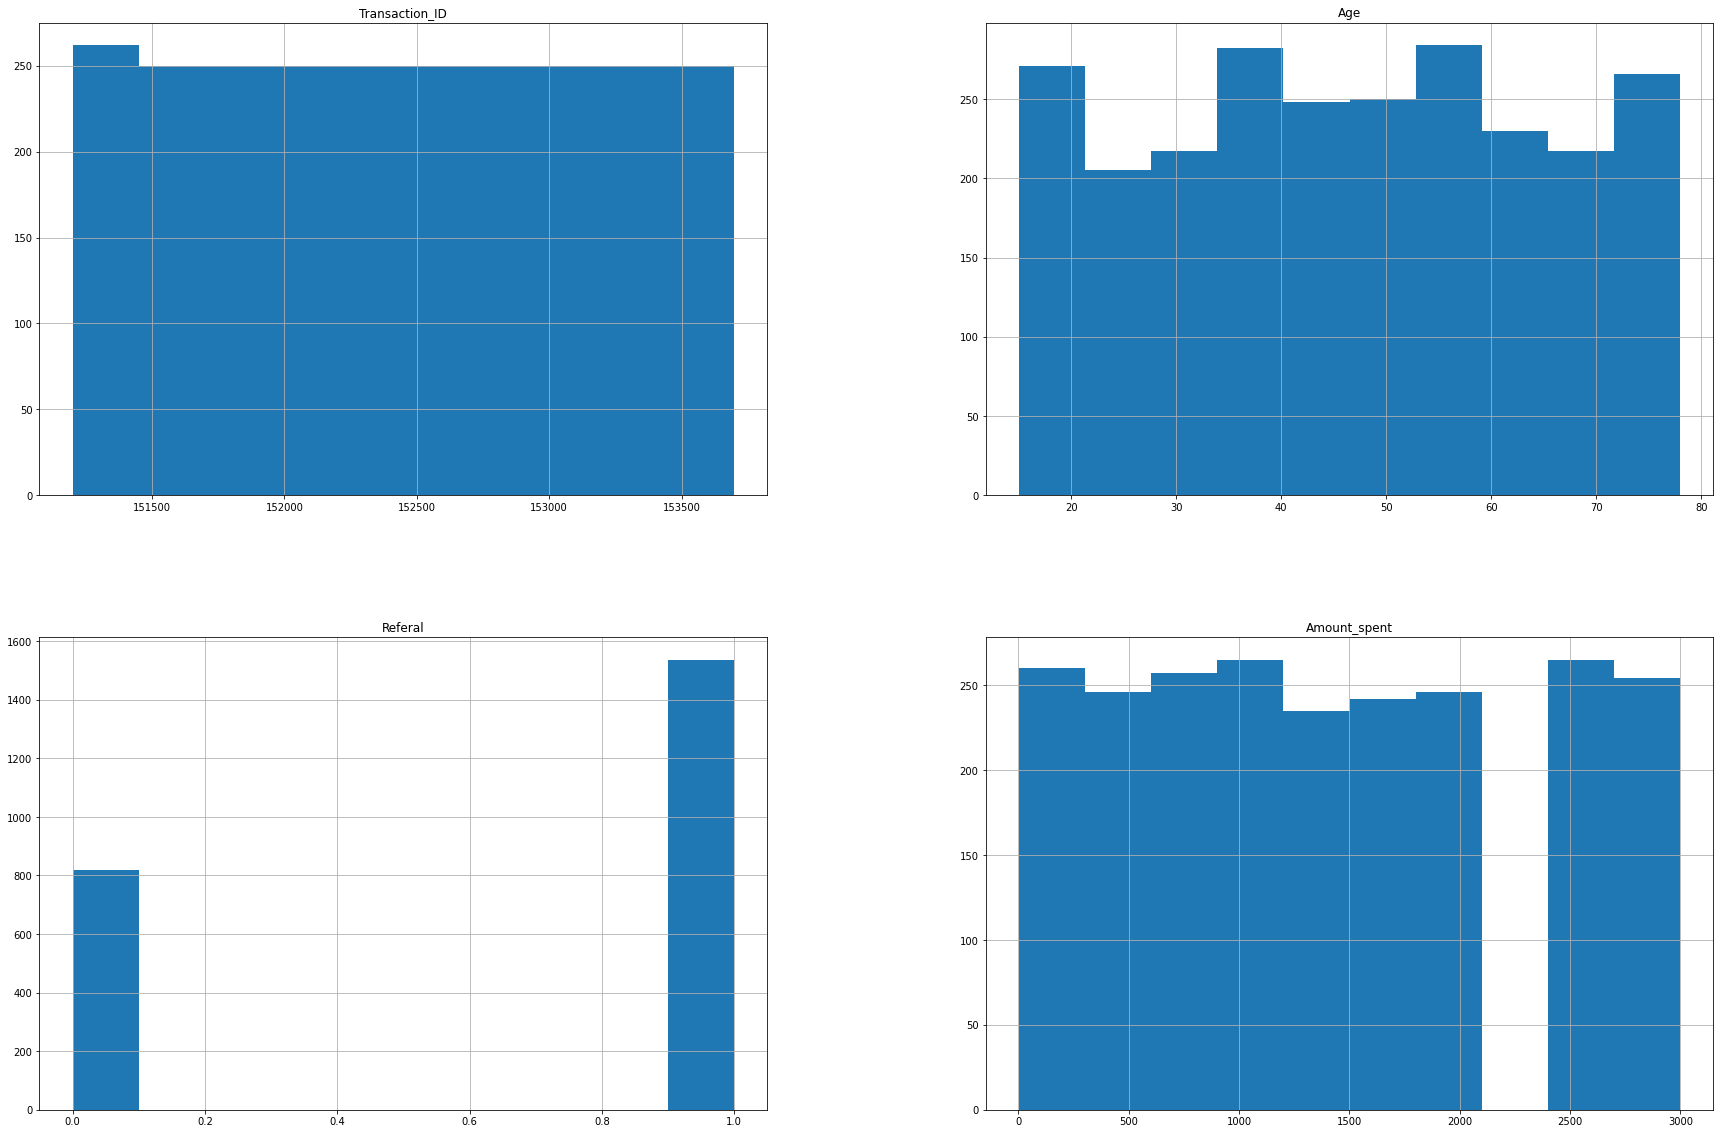

In [ ]:
h = df.hist(figsize=(30,20)) 
#히스토그램을 통한 분포 확인

In [ ]:
sex_df = df.loc['Male']
# 인덱스가 Male인 인자들만 보기
sex_df

,Transaction_date,Transaction_ID,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent
Gender,,,,,,,,,,
Male,1/1/2019,151201,49.0,Single,Illinois,Basic,self-employed,Card,0.0,544.04
Male,1/1/2019,151202,63.0,Married,New Mexico,Basic,workers,PayPal,1.0,1572.60
Male,1/1/2019,151204,27.0,Single,Connecticut,Basic,self-employed,Card,0.0,NaN
Male,1/3/2019,151205,71.0,Single,Hawaii,Basic,Employees,PayPal,1.0,2922.66
Male,1/3/2019,151207,37.0,Married,Connecticut,Basic,workers,PayPal,1.0,1149.55
...,...,...,...,...,...,...,...,...,...,...
Male,4/30/2021,153692,34.0,Married,Wyoming,Basic,self-employed,Other,1.0,1691.57
Male,4/30/2021,153693,54.0,Married,Alabama,Basic,Employees,Card,0.0,266.61
Male,4/30/2021,153694,34.0,Single,Florida,Missing,Employees,Other,1.0,286.82


In [ ]:
df

,Transaction_date,Transaction_ID,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent
Gender,,,,,,,,,,
Female,1/1/2019,151200,19.0,Single,Kansas,Basic,Unemployment,Other,1.0,2051.36
Male,1/1/2019,151201,49.0,Single,Illinois,Basic,self-employed,Card,0.0,544.04
Male,1/1/2019,151202,63.0,Married,New Mexico,Basic,workers,PayPal,1.0,1572.60
NaN,1/1/2019,151203,18.0,Single,Virginia,Platinum,workers,Card,1.0,1199.79
Male,1/1/2019,151204,27.0,Single,Connecticut,Basic,self-employed,Card,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...
Female,5/1/2021,153695,57.0,Single,South Carolina,Platinum,self-employed,Card,0.0,150.10
Female,5/1/2021,153696,36.0,Married,Hawaii,Silver,self-employed,PayPal,1.0,708.88
Male,5/1/2021,153697,22.0,Single,South Carolina,Basic,workers,PayPal,1.0,2030.07


In [ ]:
st_df = pd.read_csv("C:/Bigdata/work/Project01/online_store_customer_data.csv", index_col='State_names')
#거주중인 주의 이름을 인덱스로 하는 데이터프레임 st_df를  csv read 해서 생성
state_df = st_df.loc[['Kansas','Illinois']]
#label_location을 캔자스 및 일리노이 주로 설정
state_df

,Transaction_date,Transaction_ID,Gender,Age,Marital_status,Segment,Employees_status,Payment_method,Referal,Amount_spent
State_names,,,,,,,,,,
Kansas,1/1/2019,151200,Female,19.0,Single,Basic,Unemployment,Other,1.0,2051.36
Kansas,1/26/2019,151260,Male,55.0,Married,Basic,Employees,Other,1.0,1277.64
Kansas,1/26/2019,151260,Male,55.0,Married,Basic,Employees,Other,1.0,1277.64
Kansas,2/6/2019,151295,Female,22.0,Married,Missing,workers,Card,0.0,2061.14
Kansas,2/12/2019,151314,Female,55.0,Married,Platinum,Employees,PayPal,1.0,329.18
...,...,...,...,...,...,...,...,...,...,...
Illinois,3/1/2021,153510,Female,76.0,Married,Basic,self-employed,PayPal,1.0,631.89
Illinois,3/5/2021,153521,Female,45.0,Single,Platinum,workers,Card,1.0,1813.16
Illinois,3/7/2021,153526,Male,35.0,Single,Basic,Employees,Other,0.0,74.37


<AxesSubplot:xlabel='Employees_status', ylabel='Amount_spent'>

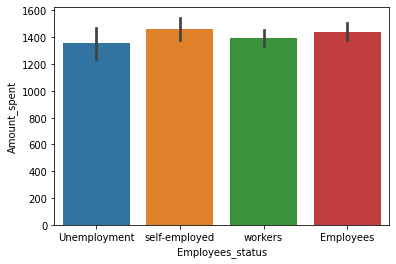

In [ ]:
sb.barplot(x='Employees_status', y='Amount_spent', data = st_df)



#캔자스 주와 일리노이 주에 사는 고객들의 고용 형태에 따른 사용 금액

#백수(Unemployment)와 노동자(workers) 에 비해 고용인 및 자영업자의 사용 금액이 근소하게 높으며,
#백수의 소비 금액이 가장 적음.

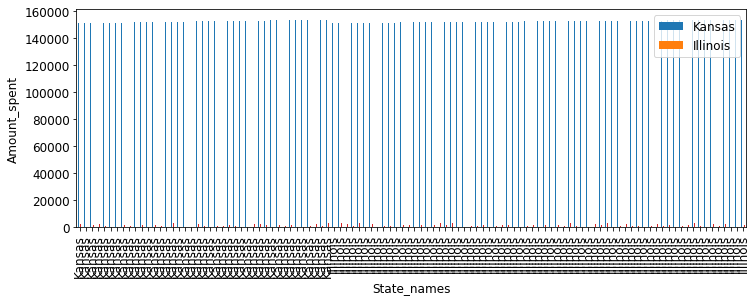

In [ ]:


ax = state_df.plot(kind='bar', title='', figsize=(12, 4), legend=True, fontsize=12)
# ax = 바 형태, 타이틀은 캔,일리 , 범례 True
ax.set_xlabel('State_names', fontsize=12) # X축 정보: 주 이름
ax.set_ylabel('Amount_spent', fontsize=12)# Y축 정보: 사용한 금액
ax.legend(['Kansas', 'Illinois'], fontsize=12)
#근데 이상하게 나옴...

Text(0, 0.5, 'Amount_spent.mean()')

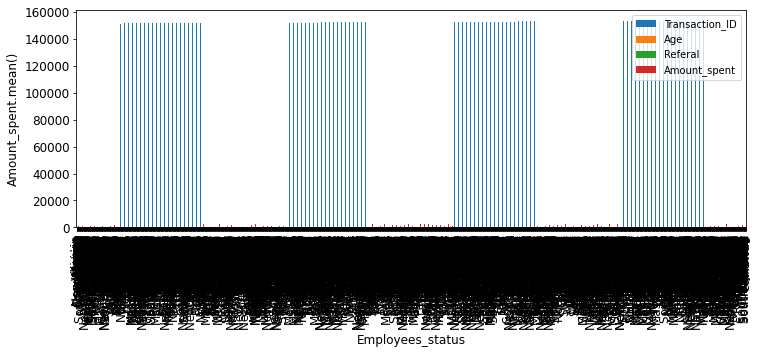

In [ ]:


ax = st_df.plot(kind='bar', title='', figsize=(12, 4), legend=True, fontsize=12)
# ax = 바 형태, 타이틀은 캔,일리 , 범례 True
ax.set_xlabel('Employees_status', fontsize=12) # X축 정보: 고용 형태
ax.set_ylabel('Amount_spent.mean()', fontsize=12)# Y축 정보: 사용한 금액

#모든 Amount_spent를 출력하며 하단에 Employee_status label만 붙여 주는 듯...


In [ ]:
em_df = pd.read_csv("C:/Bigdata/work/Project01/online_store_customer_data.csv", index_col='Employees_status')
#고용 형태를 인덱스로 하는 데이터프레임 em_df를  csv read 해서 생성

# State나 Age를 기반으로 가격을 시각화 하는 것은 State와 가격의 가짓수가 너무 많아 어려움.

# 그래서 Kansas와 Illinois 주 만을 loc하는 State_df를 사용했으나 같은 인덱스를 두번 사용할 수는 없는듯?



<AxesSubplot:xlabel='Gender', ylabel='Amount_spent'>

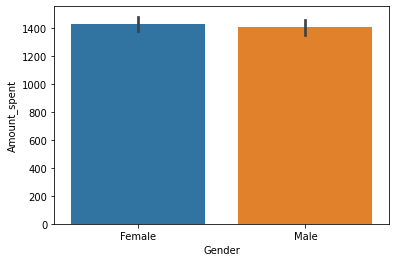

In [ ]:
sb.barplot(x='Gender', y='Amount_spent', data = em_df)

<AxesSubplot:xlabel='Segment', ylabel='Amount_spent'>

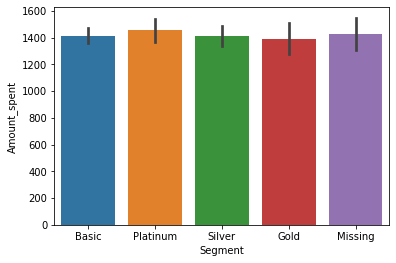

In [ ]:
sb.barplot(x='Segment', y='Amount_spent', data = em_df)

<AxesSubplot:xlabel='State_names'>

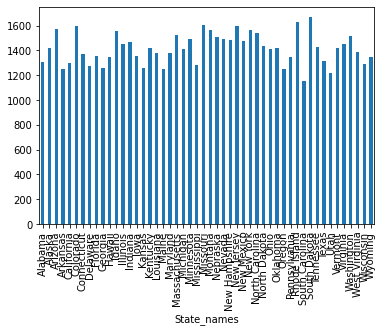

In [ ]:
# seaborn Barplot 말고 그냥 Matplotlib의 plot 이용.
g = df.groupby(["State_names"])["Amount_spent"].mean()
# g = df를 [(주 이름)과 (사용 금액) 으로 묶음].평균()
g.plot(kind = "bar")
# plot(종류 = "바")

#조금 촘촘해서 알아보기 어렵지만 Bar plot에 비해 얇고 세워져 있어 구별 가능함

<AxesSubplot:xlabel='State_names'>

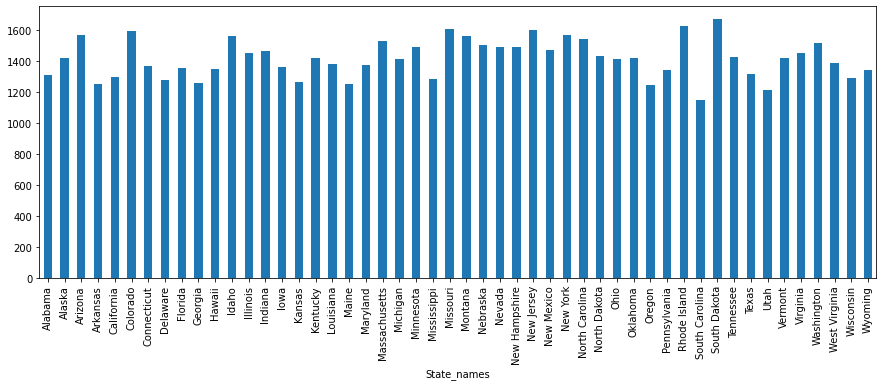

In [ ]:
g.plot.bar(figsize = (15,5))
#사이즈를 키우니 확실히 시인성이 향상

<AxesSubplot:xlabel='State_names'>

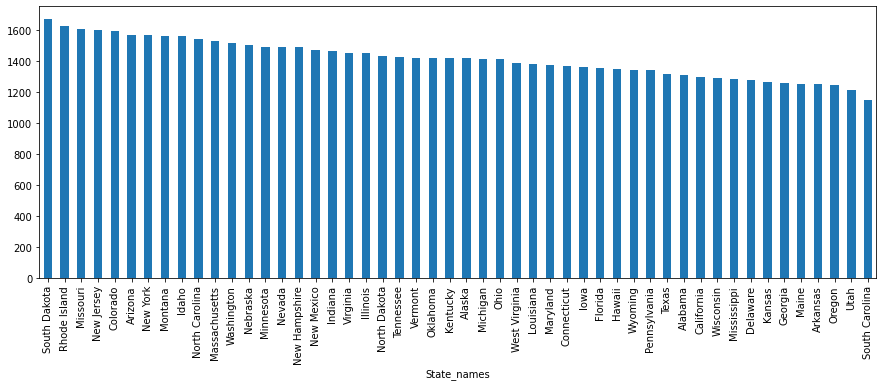

In [ ]:
g = df.groupby(["State_names"])["Amount_spent"].mean().sort_values(ascending = False)
# g = df를 [(주 이름)과 (사용 금액) 으로 묶음].평균().값으로_정렬(오름차순 = 아니오)
g.plot.bar(figsize = (15,5))

<AxesSubplot:xlabel='State_names'>

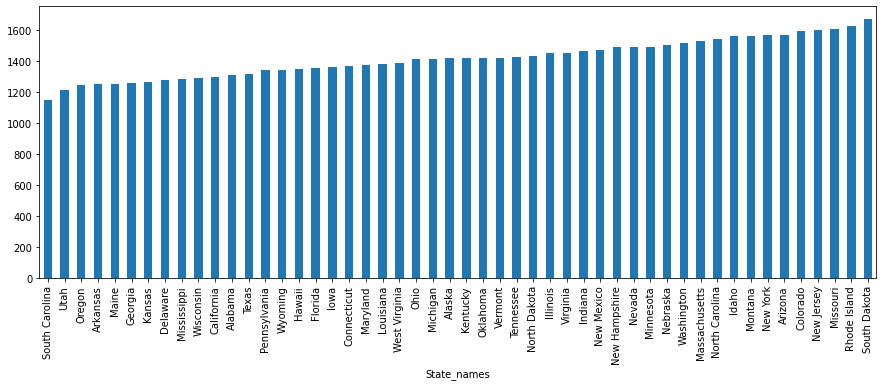

In [ ]:
g = df.groupby(["State_names"])["Amount_spent"].mean().sort_values(ascending = True)
# g = df를 [(주 이름)과 (사용 금액) 으로 묶음].평균().값으로_정렬(오름차순 = 예)
g.plot.bar(figsize = (15,5))
#종류가 다양한 자료를 시각화 할 때엔 seaborn 보다는 matplot이 좋은 듯 함.
#https://seoyuun22.tistory.com/entry/Python-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EC%8B%9C%EA%B0%81%ED%99%94-plotbarplot-boxplot-matplotlib-plot-%ED%95%9C%EA%B8%80-%EC%84%A4%EC%A0%95

<AxesSubplot:ylabel='State_names'>

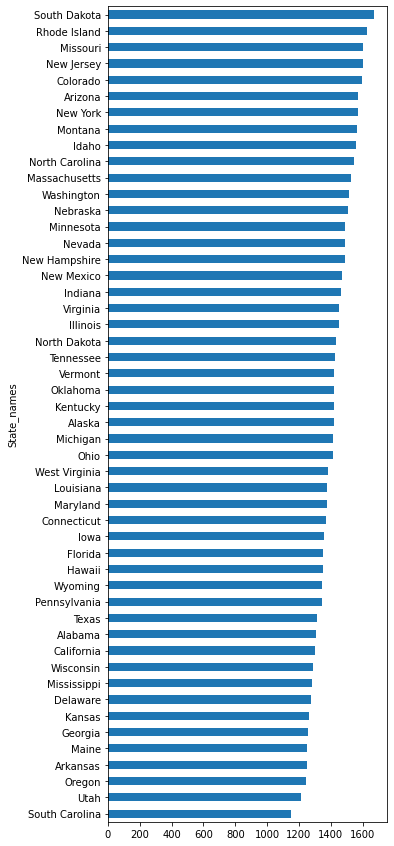

In [ ]:
g = df.groupby(["State_names"])["Amount_spent"].mean().sort_values(ascending = True)
# g = df를 [(주 이름)과 (사용 금액) 으로 묶음].평균().값으로_정렬(오름차순 = 예)
g.plot.barh(figsize = (5,15))

In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 2512 entries, Female to Male
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_date  2512 non-null   object 
 1   Transaction_ID    2512 non-null   int64  
 2   Age               2470 non-null   float64
 3   Marital_status    2512 non-null   object 
 4   State_names       2512 non-null   object 
 5   Segment           2512 non-null   object 
 6   Employees_status  2486 non-null   object 
 7   Payment_method    2512 non-null   object 
 8   Referal           2357 non-null   float64
 9   Amount_spent      2270 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 280.4+ KB


,Transaction_date,Transaction_ID,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent
Gender,,,,,,,,,,
Female,1/1/2019,151200,19.0,Single,Kansas,Basic,Unemployment,Other,1.0,2051.36
Male,1/1/2019,151201,49.0,Single,Illinois,Basic,self-employed,Card,0.0,544.04
Male,1/1/2019,151202,63.0,Married,New Mexico,Basic,workers,PayPal,1.0,1572.60
NaN,1/1/2019,151203,18.0,Single,Virginia,Platinum,workers,Card,1.0,1199.79
Male,1/1/2019,151204,27.0,Single,Connecticut,Basic,self-employed,Card,0.0,NaN


<AxesSubplot:title={'center':'day and size columns'}, ylabel='State_names'>

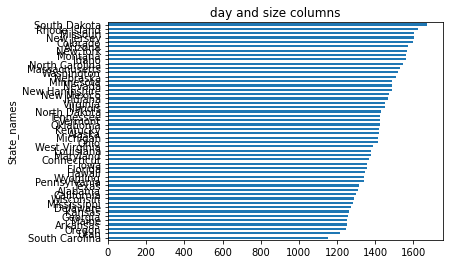

In [ ]:
g.plot(kind='barh', stacked=True, title='day and size columns')
#df를 [(주 이름)과 (사용 금액) 으로 묶은 자료 g를 수평 바 형식으로 스택 구현
#하려 했으나, 사용 금액에는 수치만 존재하여 스택 구현하지 못함.

<AxesSubplot:ylabel='Marital_status'>

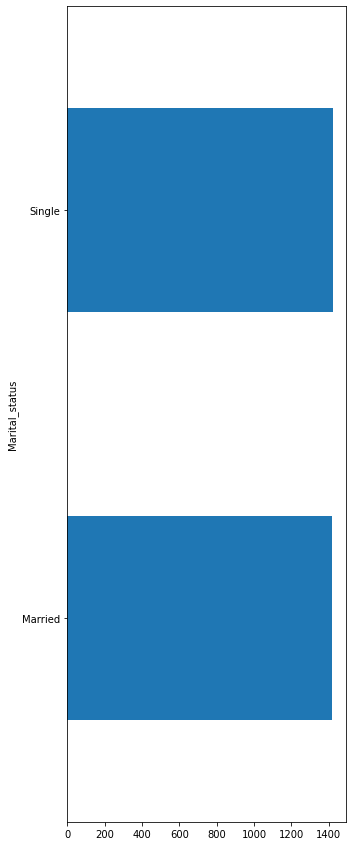

In [ ]:
k = df.groupby(["Marital_status"])["Amount_spent"].mean().sort_values(stacked=True, ascending = True)
#기혼 여부와 사용 금액을 짝지어 나타내어 보려 했으나 왜인지 모르게 Stacked를 인식하지 못함
#stacked를 제거하니 Single한줄, Married한줄이라 stack될만한 자료가 없음.
k.plot.barh(figsize = (5,15))

In [ ]:
df['State_names'].unique() # 주 이름만 모아 유니크한 이름 표시
df['Marital_status'].unique() # 기혼 여부의 유니크한 이름 표시

array(['Single', 'Married'], dtype=object)

In [ ]:
df_tab = pd.crosstab(df['State_names'],df['Marital_status'])
#주 이름과 기혼 여부를 통합한 dataframe df_tab 생성

In [ ]:
df_tab

Marital_status,Married,Single
State_names,,
Alabama,31,11
Alaska,25,16
Arizona,29,27
Arkansas,28,27
California,34,21
Colorado,27,25
Connecticut,20,32
Delaware,36,20
Florida,31,22


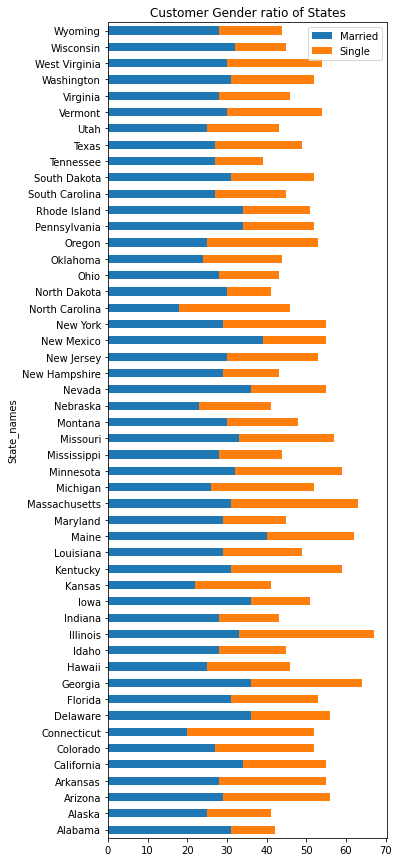

In [ ]:
df_tab.plot(kind='barh', stacked=True, title='Customer Gender ratio of States',figsize = (5,15))
#주 이름과 기혼 여부를 통합한 dataframe df_tab을 Horizontal bar 형식으로 구현
#Stack 형식으로 구현하기 위해 주 이름당 기혼 여부(기혼/미혼)을 나누고, 이를 범례에 표시
plt.legend(loc='upper right')
#범례를 우측 상단으로



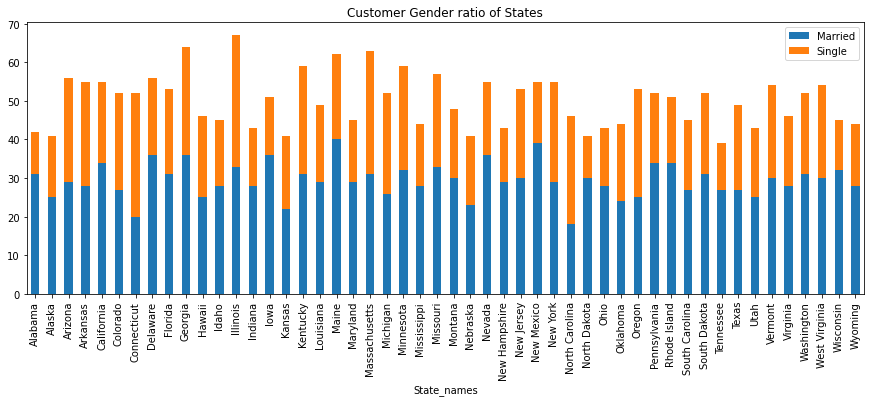

In [ ]:
df_tab.plot(kind='bar', stacked=True, title='Customer Gender ratio of States',figsize = (15,5))
#주 이름과 기혼 여부를 통합한 dataframe df_tab을 bar 형식으로 표현
#Stack 형식으로 표현하기 위해 주 이름당 기혼 여부(기혼/미혼)을 나누고, 이를 범례에 표시
plt.legend(loc='upper right')
#범례를 우측 상단으로

<AxesSubplot:ylabel='Amount_spent'>

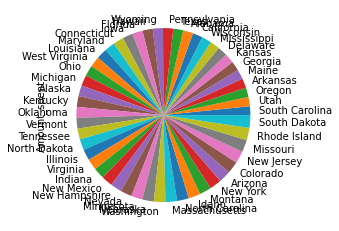

In [ ]:
g.plot(kind='pie')
#파이 형식의 차트를 생성하기 위해 kind=pie 이용. 


<AxesSubplot:ylabel='Amount_spent'>

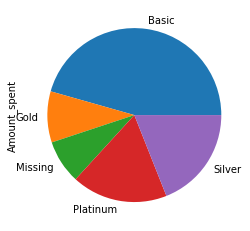

In [ ]:
p = df.groupby(["Segment"])["Amount_spent"].sum()
#Segment와 사용 금액을 모두 더해 등급별 사용 금액 파이 차트로 구현
p.plot(kind='pie')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<AxesSubplot:ylabel='Amount_spent'>

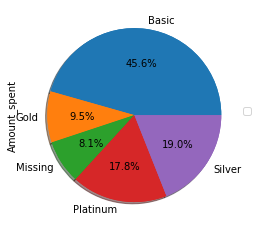

In [ ]:
p = df.groupby(["Segment"])["Amount_spent"].sum()
#plt.pie 함수를 통해 구현된 파이차트의 세부 사항 변경
plt.pie(p, shadow = True, autopct= '%.1f%%')
#       데이터프레임 p를 목표로, 그림자, 퍼센티지 표시(0.1%까지)
plt.legend(loc = (1, 0.5))

p.plot(kind='pie')


In [ ]:
df['Segment']
p

Segment
Basic       1411.730183
Gold        1389.527227
Missing     1427.676612
Platinum    1455.118731
Silver      1411.875912
Name: Amount_spent, dtype: float64